<h1 align=center><font size = 5>New York Housing Price</font></h1>

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#Introduction">Introduction</a></li>
        <li><a href="#About the data">About the Data</a></li>
        <li><a href="#Data Inspection">Data Inspection</a></li>
        <li><a href="#pre-Cleaning">Pre-cleaning</a></li>
        <li><a href="#Slicing">Data Segmenting</a></li>
        <li><a href="#Family Dwellings">Family Dwellings</a></li>
        <li><a href="#Condonimiums">Condonimiums</a></li>
        <li><a href="#Commercial Properties">Commercial Properties</a></li>
        <li><a href="#Neighborhood Comparison">Neighborhood Comparison</a></li>
        <li><a href="#Discussion">Discussion</a></li>
    </ol>
</div>
<br>
<hr>

# Introduction<a id="Introduction"></a> 

## 1. Background
New York City is one of the biggest cities in the world, with 5 Boroughs and hundreds of neighborhoods(254 different neighborhoods in the dataset). Each borough or neighborhood has its own characteristics. With Manhattan as its core, it is densely populated with an estimate of 70,826 inhabitants per square mile <a href='http://worldpopulationreview.com/boroughs/manhattan-population'>**ManhattanPopulation2019**</a>. This population density makes Manhattan the most densely populated of any county in the United States. Manhattan is the cultural, administrative and financial center of New York city, also the financial and cultural center of the world. The other four boroughs, Bronx, Brooklyn, Manhattan and Queens are also densely populated of people with different ethnicities. New York City is the world’s most sort-after metropolitan, and is the gateway for immigrants throughout the city’s history. People all over the world come here to live, study, work and invest. The records of the most expensive real estate per square feet for both commercial and residential were made here. In 2019 Manhattan is home to two of the top ten ZiP Codes in the United States by median housing price <a href='https://www.cnbc.com/2019/11/22/10-most-expensive-us-zip-codes-for-buying-a-home.html'>**TopTenZipCode2019**</a>. The real estate is a major force for the city’s economy. Therefore the real estate market is an interesting topic for many stakeholders, such as the city officials for planning, New York residents, migrants to the New York City etc.. For example, a job seeker who lands a job in the city likes to know where to stay; a real estate investor likes to know where and when to purchase/sell the properties; etc. Real estate is the most expensive investment in people’s life. Purchasing any real estate is one of the most important decisions in anybody’s lifetime.  For all who are interested in real estate in New York City, these are the two questions they have in their mind: the affordability and availability. Manhattan is home to lots of expensive real estate properties. What makes Manhattan so attractive? We will explore its venues using Foursuqare location data so that we can understand more about the local real estate market.

## 2. Problems
Real estate is a forever interesting topic. With the accessibility of modern transportation, people migrate quite often. The first thing for migrants is real estate. 
For people migrate into New York City, they like to find the answers to the following questions: 
1. What kind of housing options available there? Single family, townhouse, condos, coop etc.
2. The locations  and prices for each option
3. When is the market most active?

For people moving out of the city, they might have the following concerns:
1. What is the appropriate price to list the property?
2. What is the best time to list the property?

For real estate investors, they like to know where and when to do the transactions to maximize the  profit. 

For the city planning officials, they like to know the activities of the real estate market so that they can plan for the future business and infrastructure activities in the city.  

# About the Data<a id="About the data"></a>
## Data Acquisition
Data were obtained from Kaggle <a href='https://www.kaggle.com/new-york-city/nyc-property-sales'>**NewYorkRealEstateTransaction**</a>. This dataset contains the record of the transactions of all the real estate properties including vacant lands, buildings, apartments etc., within 12 month, from September 2016 to September 2017.

Foursquare API will be used for getting venues in the New York City.

world_countries.json file from Data Visualization course will be used for generating choropleth map. 

### This is the notebook for studying New York city real estate transactions between 09/2016 and 09/2017. The dataset was downloaded from Kaggle and stored in my local drive.

### First, get the necessary packages and read the file in with Pandas dataframe

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df=pd.read_csv("nyc-rolling-sales.csv")
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


# Data Inspection<a id="Data Inspection"></a>

In [65]:
df.info() # take a look of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
Unnamed: 0                        84548 non-null int64
BOROUGH                           84548 non-null int64
NEIGHBORHOOD                      84548 non-null object
BUILDING CLASS CATEGORY           84548 non-null object
TAX CLASS AT PRESENT              84548 non-null object
BLOCK                             84548 non-null int64
LOT                               84548 non-null int64
EASE-MENT                         84548 non-null object
BUILDING CLASS AT PRESENT         84548 non-null object
ADDRESS                           84548 non-null object
APARTMENT NUMBER                  84548 non-null object
ZIP CODE                          84548 non-null int64
RESIDENTIAL UNITS                 84548 non-null int64
COMMERCIAL UNITS                  84548 non-null int64
TOTAL UNITS                       84548 non-null int64
LAND SQUARE FEET                  84548 non-null object
GRO

In [5]:
df.drop("Unnamed: 0", axis=1, inplace=True) #this column is inherited from csv file for index

In [67]:
df["EASE-MENT"].value_counts()

     84548
Name: EASE-MENT, dtype: int64

In [6]:
# EASE-MENT column is all empty, drop it
del df["EASE-MENT"]

In [69]:
df[["BLOCK","BOROUGH"]].groupby("BLOCK").mean()

,BOROUGH
BLOCK,
1,4.076923
3,5.000000
5,5.000000
6,5.000000
7,1.000000
...,...
16315,4.000000
16316,4.000000
16317,4.000000


### it looks like that Block 1 has some mixed properties in different borough. "BLOCK" does not look like a good predictor for location.

In [70]:
print(df["BLOCK"].min())
print(df["BLOCK"].max())

1
16322


## Empty cells and cells with "-" are not NULL cells 
Real estate sales are all about location and location. Let's check whether any cell in columns "BOROUGH",
"NEIGHBORHOOD", "BUILDING CLASS CATEGORY" is empty or filled with "-"

In [71]:
print(df['BOROUGH'].value_counts().sum())
df['BOROUGH'].unique() #check the number of transactions in each borough 

84548


array([1, 2, 3, 4, 5])

In [72]:
print(df["NEIGHBORHOOD"].value_counts().sum())
df["NEIGHBORHOOD"].value_counts()

84548


FLUSHING-NORTH              3068
UPPER EAST SIDE (59-79)     1736
UPPER EAST SIDE (79-96)     1590
UPPER WEST SIDE (59-79)     1439
BEDFORD STUYVESANT          1436
                            ... 
VAN CORTLANDT PARK             2
EAST RIVER                     1
BRONX PARK                     1
CITY ISLAND-PELHAM STRIP       1
PELHAM BAY                     1
Name: NEIGHBORHOOD, Length: 254, dtype: int64

In [73]:
df["ZIP CODE"].unique()

array([10009,     0, 10002, 10011, 10001, 10014, 10010, 10013, 10038,
       10007, 10036, 10019, 10018, 10003, 10005, 10004, 10006, 10016,
       10012, 10026, 10030, 10031, 10027, 10035, 10037, 10029, 10039,
       10032, 10128, 10463, 10034, 10025, 10022, 10017, 10167, 10023,
       10105, 10033, 10044, 10280, 10282, 10281, 10065, 10021, 10075,
       10028, 10024, 10069, 10040, 10457, 10458, 10451, 10456, 10469,
       10466, 10475, 10468, 10467, 10460, 10473, 10472, 10464, 10462,
       10803, 10465, 10459, 10471, 10453, 10452, 10454, 10474, 10455,
       10461, 10470, 11228, 11214, 11220, 11209, 11219, 11221, 11233,
       11213, 11206, 11216, 11205, 11238, 11226, 11204, 11234, 11217,
       11201, 11218, 11232, 11230, 11235, 11212, 11237, 11207, 11236,
       11239, 11231, 11249, 11224, 11225, 11208, 11210, 11203, 11229,
       11215, 11223, 11222, 11211, 11370, 11691, 11692, 11102, 11106,
       11103, 11377, 11105, 11101, 11361, 11360, 11357, 11358, 11364,
       11693, 11694,

In [74]:
df[df["ZIP CODE"]==0].shape

(982, 20)

In [75]:
df["ZIP CODE"].replace(0,np.nan,inplace=True)
df["ZIP CODE"].isnull().sum()

982

### **There are 982 entries with Zip Code 0. Obviously these are wrong.**

In [76]:
# ZIP CODE: replace with zip code the ones in the same neighborhood, 
# the following code failed due to some neighborhoods has all zip code set to 0. Will work on it later.
#df["ZIP CODE"] =df[["NEIGHBORHOOD", "ZIP CODE" ]].\
#                       groupby(["NEIGHBORHOOD"]).\
#                        transform(lambda x: x.fillna(x.value_counts().idxmax()))

In [77]:
print(df["BUILDING CLASS CATEGORY"].value_counts().sum())
df["BUILDING CLASS CATEGORY"].value_counts()

84548


01 ONE FAMILY DWELLINGS                         18235
02 TWO FAMILY DWELLINGS                         15828
13 CONDOS - ELEVATOR APARTMENTS                 12989
10 COOPS - ELEVATOR APARTMENTS                  12902
03 THREE FAMILY DWELLINGS                        4384
07 RENTALS - WALKUP APARTMENTS                   3466
09 COOPS - WALKUP APARTMENTS                     2767
04 TAX CLASS 1 CONDOS                            1656
44 CONDO PARKING                                 1441
15 CONDOS - 2-10 UNIT RESIDENTIAL                1281
05 TAX CLASS 1 VACANT LAND                       1248
17 CONDO COOPS                                   1201
22 STORE BUILDINGS                                935
12 CONDOS - WALKUP APARTMENTS                     926
14 RENTALS - 4-10 UNIT                            671
29 COMMERCIAL GARAGES                             587
43 CONDO OFFICE BUILDINGS                         475
31 COMMERCIAL VACANT LAND                         463
08 RENTALS - ELEVATOR APARTM

In [78]:
df["BUILDING CLASS AT TIME OF SALE"].value_counts()

R4    12989
D4    12666
A1     6751
A5     5671
B2     4918
      ...  
HS        1
Y1        1
Q8        1
M2        1
HH        1
Name: BUILDING CLASS AT TIME OF SALE, Length: 166, dtype: int64

In [7]:
df_test = df["BUILDING CLASS AT TIME OF SALE"].value_counts().to_frame("counts")
df_test

,counts
R4,12989
D4,12666
A1,6751
A5,5671
B2,4918
...,...
HS,1
Y1,1
Q8,1
M2,1


In [80]:
print(df_test[df_test["counts"]<50].sum())
#df_test[df_test["counts"]<50].index.to_list()

counts    1107
dtype: int64


In [81]:
#df[df["BUILDING CLASS AT TIME OF SALE"].isin(df_test[df_test["counts"]<50].index.to_list())].shape

(1107, 20)

### **There are 1107 properties in the categories with very less than 50 in the same category. Save them to a file, _unusual.csv_ and remove them later.**

In [8]:
df[df["BUILDING CLASS AT TIME OF SALE"].isin(df_test[df_test["counts"]<50].index.to_list())]. \
    to_csv("unusual.csv")

#### It seems that all these three columns are filled. Since the target variable is "SALE PRICE", "BUILDING CLASS AT TIME OF SALE" could be a potential feature. "BLOCK" and "LOT" are for tax collection purpose, plus "BLOCK" column has some suspicious numbers as discussed above, therefore, will be ignored here.

In [83]:
df['TAX CLASS AT TIME OF SALE'].value_counts()

1    41533
2    36726
4     6285
3        4
Name: TAX CLASS AT TIME OF SALE, dtype: int64

In [84]:
df['TAX CLASS AT PRESENT'].value_counts()

1     38633
2     30919
4      6140
2A     2521
2C     1915
1A     1444
1B     1234
2B      814
        738
1C      186
3         4
Name: TAX CLASS AT PRESENT, dtype: int64

### **There are only 4 properties in Tax Class==3. Just slice them out and save to file tax3.csv**

In [85]:
df[df['TAX CLASS AT TIME OF SALE']==3].shape

(4, 20)

In [9]:
df[df['TAX CLASS AT TIME OF SALE']==3].to_csv("tax3.csv")

Since the project is for sale price, only the column "TAX CLASS AT TIME OF SALE" will be used.

#### "Address", "APARTMENT NUMBER" and "ZIPCODE" are all embedded in the "BOROUGH" and "NEIGHBORHOOD". Some neighborhoods share the same zip code. "RESIDENTIAL UNIT", "COMMERCIAL UNIT" and "TOTAL UNIT" are included in "BUILDING CLASS CATEGORY", and will not be used for sale price. Ideally, it is better to predict $/sq.ft for the properties. However, only square ft. for single, two- and three-family and commercial units are listed. It does not make sense to replace missing square ft for condos with the square ft. numbers from other building categories. Therefore, just keep the columns intact.

#### The age of the property is important in sale price prediction. Therefore, the "YEAR BUILT" and "SALE DATE" will be used to calculate age of the properties. Let's take a look of these two columns.

In [87]:
df["SALE DATE"].unique()

array(['2017-07-19 00:00:00', '2016-12-14 00:00:00',
       '2016-12-09 00:00:00', '2016-09-23 00:00:00',
       '2016-11-17 00:00:00', '2017-07-20 00:00:00',
       '2017-06-20 00:00:00', '2016-11-07 00:00:00',
       '2016-10-17 00:00:00', '2016-09-06 00:00:00',
       '2017-03-10 00:00:00', '2017-04-28 00:00:00',
       '2017-06-09 00:00:00', '2017-07-14 00:00:00',
       '2017-03-16 00:00:00', '2016-09-01 00:00:00',
       '2017-08-17 00:00:00', '2016-09-07 00:00:00',
       '2017-08-30 00:00:00', '2017-06-21 00:00:00',
       '2017-01-30 00:00:00', '2017-07-07 00:00:00',
       '2017-08-04 00:00:00', '2017-01-09 00:00:00',
       '2017-04-18 00:00:00', '2017-06-19 00:00:00',
       '2017-08-28 00:00:00', '2017-05-10 00:00:00',
       '2016-12-02 00:00:00', '2017-01-31 00:00:00',
       '2017-06-28 00:00:00', '2016-12-07 00:00:00',
       '2017-08-24 00:00:00', '2017-06-27 00:00:00',
       '2017-03-17 00:00:00', '2017-06-14 00:00:00',
       '2017-01-17 00:00:00', '2017-01-11 00:0

In [88]:
print(df["SALE DATE"].value_counts().sum())
df["SALE DATE"].value_counts()

84548


2017-06-29 00:00:00    544
2017-06-15 00:00:00    530
2016-12-22 00:00:00    527
2017-05-25 00:00:00    511
2016-10-06 00:00:00    508
                      ... 
2017-01-08 00:00:00      2
2016-11-27 00:00:00      2
2017-07-09 00:00:00      2
2017-06-04 00:00:00      1
2017-08-13 00:00:00      1
Name: SALE DATE, Length: 364, dtype: int64

#### **It shows all the "SALE DATE" are valid**

In [89]:
df[df["SALE DATE"].str.contains("2016-09")].shape

(7779, 20)

In [90]:
df[df["SALE DATE"].str.contains("2017-09")].shape

(0, 20)

### **It is safe to extract months from "SALE DATE". No overlap of 2016-09 and 2017-09**

In [91]:
df["YEAR BUILT"].unique()

array([1900, 1913, 1920, 1910, 2009, 1925, 1902, 1928, 1930, 1935, 1937,
       1915, 1950, 1929, 1901, 1940, 2005,    0, 1989, 2014, 2008, 1965,
       2013, 2003, 2006, 2007, 1951, 1899, 1850, 1905, 1864, 1917, 1911,
       1983, 1926, 1963, 1960, 1889, 1898, 1939, 1938, 1927, 1909, 1958,
       1904, 1907, 1987, 1931, 1984, 1948, 2004, 1918, 1875, 2012, 1973,
       2011, 1922, 2001, 1932, 1980, 1908, 1953, 1906, 2015, 1946, 1921,
       2010, 1954, 1111, 1924, 1990, 1890, 1991, 1988, 1895, 2016, 1957,
       1986, 1966, 1998, 1870, 1923, 1969, 2017, 1968, 1934, 1956, 1982,
       1914, 1903, 1967, 1840, 1912, 1964, 1955, 1961, 1851, 2000, 1959,
       1962, 1945, 1972, 1976, 1916, 1880, 1970, 1846, 1941, 1952, 1896,
       1985, 1981, 1888, 1947, 1975, 1974, 2002, 1994, 1892, 1894, 1891,
       1996, 1997, 1949, 1999, 1800, 1979, 1971, 1977, 1942, 1978, 1826,
       1881, 1919, 1883, 1936, 1993, 1995, 1933, 1992, 1943, 1944, 1847,
       1829, 1844, 1835, 1852, 1856, 1854, 1832, 18

In [92]:
df["YEAR BUILT"].value_counts()

0       6970
1920    6045
1930    5043
1925    4312
1910    3585
        ... 
1832       1
1849       1
1829       1
1111       1
1888       1
Name: YEAR BUILT, Length: 158, dtype: int64

### There are 6970 entries with "YEAR BUILT" 0, which are wrong.

### There 6970 properties with "YEAR BUILT" set to 0 and 1 property to 1111. Year 0 and 1111 look like errors in the data, will be replaced with median of the similar properties within the same neighborhood and the same building class category. "SALE DATE" column seems containing all valid data.

### _Let's inspect "SALE PRICE"_

In [93]:
df["SALE PRICE"].value_counts()

 -        14561
0         10228
10          766
450000      427
550000      416
          ...  
485369        1
195225        1
383840        1
657200        1
425808        1
Name: SALE PRICE, Length: 10008, dtype: int64

In [10]:
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors='coerce')

In [11]:
print(df["SALE PRICE"].min())
print(df["SALE PRICE"].max())

0.0
2210000000.0


In [96]:
df[(df["SALE PRICE"]>=50000000) & (df["SALE PRICE"]<100000000)].shape

(75, 20)

In [12]:
df[(df["SALE PRICE"]>=50000000) & (df["SALE PRICE"]<100000000)].to_csv("high_value.csv")

### There are 122 properties valued more than 50000000, less than 100million. Save them to a file, _high_value.csv_

In [98]:
df[df["SALE PRICE"]>=100000000].shape

(48, 20)

In [13]:
df[df["SALE PRICE"]>=100000000].to_csv("Veryhigh_value.csv")

### There are 48 properties valued more than $100,000,000. Save them to a file, _Veryhigh_value.csv_

#### **There are 14561 properties with sale price not disclosed, labeled as "-". And there are 10228 properties with sale price of 0, which means a transfer. Also, there are properties sold with less than $10000, which looks like some kind of close tie transfers. I will exclude those rows from the study.**

#### ***Right now, only two columns were dropped, "Unnamed: 0" and "EASE-MENT". Before working on the missing values for columns such as "YEAR BUILT" and "SALE PRICE", let's first find out whether there are duplicates in the rows.***

# Pre-Cleaning<a id="pre-Cleaning"></a>

## Data cleaning
Data were downloaded from Kaggle website and uploaded to my account in myJupterNoteBook. The dataset contains 22 columns and 84548 entries(rows).
1. Checking Null fields in the data shows no NULL field. However, after studying the data, there are lots of fields are either empty, filled with “-”. The  entire column of “EASE-MENT” is empty. And the first column “Unname: 0” is a redundant index inherited from the original file. Therefore, these two columns were deleted. Before working on the missing values, I decided to check duplicate entries(rows) in the dataset.
2. Checked the duplicates with all the columns included and dropped 765 duplicated entries. Furthermore, checked whether same transaction was entered multiple times with different date and dropped other 593 entries.  Even more,  the same property could be transacted multiple times with different prices,  which is quite common if a property was transferred and later sold in market value. If a property was auctioned and quickly resold on the market, there will be multiple entries in the dataset also. Apparently there are 2398 duplicate entries with different prices. Therefore, for those duplicated rows,  the one with the highest price is kept.
3. Since the response variable is “SALE PRICE”, let’s check this column again. There are still 13909 rows with “-”, 9740 rows of 0, 731 with value 10. Remove the rows with “SALE PRICE” are “-” and 0. Even if some of the properties are cheap in the other boroughs except Manhattan, the transactions with price less than 10,000 are probably not market transactions. These transactions are probably interpersonal, do not reflect any market values. There are 1102 entries with “SALE PRICE” value less than 10,000 being removed.
4. The age of a property could be a potential indicator for “SALE PRICE”. Let’s take a look of “YEAR BUILT”. There are 6970 entries with “YEAR BUILT” set to 0, which means erroneous entries. The best replacements of the 0s are the medians of the “YEAR BUILT” of each neighborhood.
5. The cells for “LAND SQUARE FEET” and “GROSS SQUARE FEET” for the majority of condos and commercial properties are empty, only filled for the most of single, two or three family dwellings. Based on this observation and the characteristics of the real estate market, the dataset is segmented into three subsets based on “TAX CLASS AT TIME OF SALE”. The original dataset only has 4 entries in Tax Class3. After the previous clean-up, these 3 entries are gone. Here is the explanation of Tax Classes TaxClassNYC. In brief, Class 1&2 are residential, Class 3 are properties for utility companies, Class 4 are all other non-residential. Class 2 is for big condominium towers, while Class 1 is for single, two or three family dwellings, small condominium buildings with less than three stories. Commercial and residential real estate market are quite different. In New York City, the small family dwellings, such as single, two or three family houses, are different with condominium towers. The dataset was segmented into these three categories. 
6. Feature selection and missing value replacements will be coded separately for each subset. As discussed previously, these three segments are quite different entities in New York City real estate market. It is rational to study them separately in order to answer those questions for those interested stakeholders.

## 1. Duplicates
First, check there are duplicate entries

In [100]:
sum(df.duplicated()) #duplicates with all the columns in the dataframe

765

### There are 765 duplicates in the data entries, rows. Let's remove the duplicates

In [14]:
df.drop_duplicates(inplace=True)
df.shape

(83783, 20)

In [102]:
# Let's check whether the same transactions were input with different sale date
sum(df.iloc[:, 0:19].duplicated()) 

593

It shows that there are 593 transactions were duplicates with the different sale date. Since our target is the sale price, let's remove these duplicates. Before removing these duplicates, the one with the most current date will be kept. The dataframe will be sorted according to the "SALE DATE" in ascending order. Then keep the last of the duplicates of the dataframe excluding "SALE DATE" column

In [103]:
df["SALE DATE"].value_counts()

2017-06-29 00:00:00    541
2016-12-22 00:00:00    522
2017-05-25 00:00:00    511
2016-10-06 00:00:00    506
2017-03-30 00:00:00    492
                      ... 
2017-01-08 00:00:00      2
2016-11-27 00:00:00      2
2017-02-12 00:00:00      2
2017-06-04 00:00:00      1
2017-08-13 00:00:00      1
Name: SALE DATE, Length: 364, dtype: int64

In [15]:
df.sort_values(by="SALE DATE", inplace=True) #sort according to the "SALE DATE" in ascending order

In [105]:
#duplicated rows with all the columns excluding "SALE DATE"
sum(df.iloc[:, 0:19].duplicated())

593

In [16]:
#keep the most current date for the duplicates
df.drop_duplicates(df.columns[0:19], keep="last", inplace=True) 
df.shape

(83190, 20)

Now let's check whether there are properties entered as different prices. This could happen that a property was sold in auction with one price and later on resold with another price. Usually the higher price is a more market value, which is the one more valid for the study.

In [107]:
#duplicated rows with all the columns excluding "SALE DATE" and "SALE PRICE"
sum(df.duplicated(df.columns[0:18]))

2398

The above shows that there are 765 exactly the same entries, there are 593 properties were transacted multiple times within a year with the same price. Then there are 2398 properties were transacted multiple times within a year with different prices.

sort the dataframe according to "SALE PRICE" in descending order, keep the highest transaction price of the 
same property. First convert "SALE PRICE" to numeric and "-" to NaN

In [17]:
df.sort_values(by="SALE PRICE", ascending=False, inplace=True)
df.shape

(83190, 20)

In [18]:
#drop duplicates and keep the highest price
df.drop_duplicates(df.columns[0:18], inplace=True)
df.shape

(80792, 20)

In [19]:
#sort the dataframe accoring to the original order from csv file
df.sort_values(by=["BOROUGH", "NEIGHBORHOOD", "BUILDING CLASS CATEGORY", "BLOCK", "LOT"], inplace=True) 
df.reset_index(drop=True,inplace=True)

### 2. "SALE PRICE" cleaning
Now let's work on the values of sale price. The non-disclosed value(NaN), 0 and less than $10000 should be all removed. 

In [111]:
df["SALE PRICE"].value_counts(dropna=False)

NaN            13245
0.0             9077
10.0             670
450000.0         419
550000.0         412
               ...  
734750.0           1
246549.0           1
155000000.0        1
2301245.0          1
849900.0           1
Name: SALE PRICE, Length: 9795, dtype: int64

In [20]:
#drop the rows with non-disclosed sale price
df.dropna(axis=0, subset=["SALE PRICE"],inplace=True )
df.shape

(67547, 20)

In [113]:
df["SALE PRICE"].value_counts(dropna=False)

0.0            9077
10.0            670
450000.0        419
550000.0        412
650000.0        411
               ... 
246549.0          1
155000000.0       1
2301245.0         1
129386.0          1
849900.0          1
Name: SALE PRICE, Length: 9794, dtype: int64

In [21]:
#let's check how many rows with sale price less than $10000
df[df["SALE PRICE"]<10000].shape

(10179, 20)

In [22]:
#drop the rows with sale price less than $10000
df.drop(df[df['SALE PRICE']<10000].index, axis=0, inplace=True) 
df.shape

(57368, 20)

In [24]:
df.reset_index(drop=True, inplace=True)

In [23]:
df[df["SALE PRICE"]>50000000].shape

(121, 20)

#### **There are only 0.2% properties valued more than $50,000,000. These properties have been saved to a file. Delete them for the study.**

In [118]:
#drop the rows with sale price less than $10000
#df.drop(df[df["SALE PRICE"]>50000000].index, axis=0, inplace=True) 
#df.shape

### 3. "BUILDING CLASS AT TIME OF SALE" cleaning

In [119]:
df["BUILDING CLASS AT TIME OF SALE"].value_counts()

D4    11247
R4    10210
A1     4595
A5     3965
B2     3088
      ...  
HS        1
M2        1
O9        1
J1        1
J4        1
Name: BUILDING CLASS AT TIME OF SALE, Length: 153, dtype: int64

In [120]:
#df_counts=df["BUILDING CLASS AT TIME OF SALE"].value_counts().to_frame("counts")

In [121]:
#df_counts[df_counts["counts"]<50].sum()

counts    915
dtype: int64

In [26]:
#df_counts[df_counts["counts"]<50].to_csv("unusual_after_cleaning.csv")

In [27]:
#df[df["BUILDING CLASS AT TIME OF SALE"].isin(df_counts[df_counts["counts"]<50].index.to_list())].shape

## 4. Missing values replacement
Recheck 0s in "ZIP CODE", "YEAR BUILT"

### Remove 938 unusual properties. If interested, could study the file _unusual.csv_ 

In [124]:
#df.drop(df[df["BUILDING CLASS AT TIME OF SALE"].\
#           isin(df_counts[df_counts["counts"]<50].index.to_list())].index, axis=0, inplace=True) 
#df.shape

In [144]:
df[(df["YEAR BUILT"]==0) | (df["YEAR BUILT"]==1111)].shape

(0, 22)

In [28]:
df["YEAR BUILT"].replace([0,1111], np.nan, inplace=True)
df["YEAR BUILT"].isnull().sum()

4087

In [130]:
# Try the following and failed because some neighborhood has NaN in all the "YEAR BUILT"
#df["YEAR BUILT"] =df[["NEIGHBORHOOD","YEAR BUILT" ]].\
#                       groupby(["NEIGHBORHOOD"]).\
#                        transform(lambda x: x.fillna(x.value_counts().idxmax()))

## 4. Add columns
It is time to add two columns. "SALE MONTH" might help for "SALE PRICE" or activities of the transactions. "BUILDING CLASS NUMBER" is the column to encode the "BUILDING CLASS AT TIME OF SALE".

In [29]:
df["SALE MONTH"]= pd.to_datetime(df["SALE DATE"]).dt.month
df["SALE MONTH"].value_counts()

6     5866
9     5156
12    5151
5     5093
3     5053
1     4641
7     4604
11    4578
10    4346
4     4316
8     4307
2     4257
Name: SALE MONTH, dtype: int64

### "BUILDGING CLASS AT TIME OF SALE" contains string with two letters, the first is always an alphabet, the second could be an alphabet or a number. Instead of one-hot encoding because of the curse of dimensionality, I will encode in the following way,
1. change the first letter, always uppercase, to its ASCII and us it as the whole number
2. change the second letter(if it is numerical, cast it to int and /10; if it is an alphebet, uppercase it and change to ASCII/100)

In [31]:
from more_itertools import sliced

In [32]:
df["BUILDING CLASS NUMBER"]=df["BUILDING CLASS AT TIME OF SALE"] \
                                                                .apply(lambda x: \
                                                                    ord(list(sliced(x, 1))[0].upper())+\
                                                                    (int(list(sliced(x, 1))[1])/10 \
                                                                     if list(sliced(x, 1))[1].isnumeric() \
                                                                     else ord(list(sliced(x, 1))[1].upper())\
                                                                     /100)) 

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57368 entries, 0 to 57367
Data columns (total 22 columns):
BOROUGH                           57368 non-null int64
NEIGHBORHOOD                      57368 non-null object
BUILDING CLASS CATEGORY           57368 non-null object
TAX CLASS AT PRESENT              57368 non-null object
BLOCK                             57368 non-null int64
LOT                               57368 non-null int64
BUILDING CLASS AT PRESENT         57368 non-null object
ADDRESS                           57368 non-null object
APARTMENT NUMBER                  57368 non-null object
ZIP CODE                          57368 non-null int64
RESIDENTIAL UNITS                 57368 non-null int64
COMMERCIAL UNITS                  57368 non-null int64
TOTAL UNITS                       57368 non-null int64
LAND SQUARE FEET                  57368 non-null object
GROSS SQUARE FEET                 57368 non-null object
YEAR BUILT                        53281 non-null float64
T

# Data Segmenting<a id="Slicing"></a>
We will work on those 0s after segmenting the data. Now let's divide the dataframe according to the "TAX CLASS AT TIME OF SALE"

In [135]:
df["TAX CLASS AT TIME OF SALE"].value_counts()

2    29122
1    25899
4     2347
Name: TAX CLASS AT TIME OF SALE, dtype: int64

In [34]:
df[df["TAX CLASS AT TIME OF SALE"]==4].to_csv("tax4.csv")
df.shape

(57368, 22)

In [35]:
df.drop(df[df["TAX CLASS AT TIME OF SALE"]==4].index, axis=0, inplace=True)
df.shape

(55021, 22)

In [138]:
df["BUILDING CLASS AT TIME OF SALE"].value_counts()

D4    11247
R4    10210
A1     4595
A5     3965
B2     3088
B1     2681
C6     2482
B3     2429
C0     2241
A2     1913
R3     1079
R1     1026
R9     1012
A9      963
B9      925
R2      647
C3      557
V0      465
S2      425
C1      407
C2      378
A0      280
A3      238
D0      207
S1      207
C7      183
R6      149
A4      127
S9      112
D1       95
C5       90
S3       88
C4       87
A6       67
S4       66
S5       53
D7       41
G0       40
R8       37
D3       25
RR       18
D6       13
D9       10
C9        9
D5        9
A7        8
C8        6
S0        6
Z0        6
D2        5
V2        1
R0        1
CM        1
V3        1
Name: BUILDING CLASS AT TIME OF SALE, dtype: int64

### Since Tax class1 and class2 are for residential, divide up into two groups, family_dweling and condonimiums

In [36]:
df[df["BUILDING CLASS CATEGORY"].str.contains("01") |\
            df["BUILDING CLASS CATEGORY"].str.contains("02") |\
            df["BUILDING CLASS CATEGORY"].str.contains("03") ].shape

(24158, 22)

In [37]:
df[df["BUILDING CLASS CATEGORY"].str.contains("01") |\
            df["BUILDING CLASS CATEGORY"].str.contains("02") |\
            df["BUILDING CLASS CATEGORY"].str.contains("03") ].to_csv("family_dwellings.csv")

In [38]:
df.drop(df[df["BUILDING CLASS CATEGORY"].str.contains("01") |\
            df["BUILDING CLASS CATEGORY"].str.contains("02") |\
            df["BUILDING CLASS CATEGORY"].str.contains("03") ].index, axis=0, inplace=True)
df.shape

(30863, 22)

In [39]:
df.to_csv("condos.csv")

## Done pre-cleaning.
The only relevant missing values are in "YEAR BUILT". As shown above, the tries failed. We will work on them in each segment.
The file is very long now. It is hard to surf around. I will do the three segments in different files, "family_dwellings", "condos" and "commercial".

<h1 align=center><font size = 5>Family Dwellings Data Visulization and modeling</font></h1> 


### This notebook reads the data from my local drive, of the file segmented from introduction notebook.

In [2]:
df=pd.read_csv("family_dwellings.csv")
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,SALE MONTH,BUILDING CLASS NUMBER
0,146,1,CHELSEA,01 ONE FAMILY DWELLINGS,1,771,52,A9,224 WEST 22ND STREET,,...,1,1975,3855,1901.0,1,A9,7425000.0,2016-12-30 00:00:00,12,65.9
1,147,1,CHELSEA,02 TWO FAMILY DWELLINGS,1,769,49,S2,218 WEST 20TH STREET,,...,3,2150,4978,1920.0,1,S2,7750000.0,2017-04-17 00:00:00,4,83.2
2,148,1,CHELSEA,03 THREE FAMILY DWELLINGS,1,719,67,C0,444 WEST 22ND STREET,,...,3,2469,3725,1901.0,1,C0,8300000.0,2017-02-02 00:00:00,2,67.0
3,1419,1,EAST VILLAGE,02 TWO FAMILY DWELLINGS,1,436,1,S2,138 1 AVENUE,,...,3,1200,3360,1900.0,1,S2,3000000.0,2017-08-31 00:00:00,8,83.2
4,1420,1,EAST VILLAGE,02 TWO FAMILY DWELLINGS,1,458,47,S2,4 EAST 2ND STREET,,...,3,1280,5920,1899.0,1,S2,6800000.0,2017-01-23 00:00:00,1,83.2


In [3]:
del df["Unnamed: 0"]

## Data Inspection

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24158 entries, 0 to 24157
Data columns (total 22 columns):
BOROUGH                           24158 non-null int64
NEIGHBORHOOD                      24158 non-null object
BUILDING CLASS CATEGORY           24158 non-null object
TAX CLASS AT PRESENT              24158 non-null object
BLOCK                             24158 non-null int64
LOT                               24158 non-null int64
BUILDING CLASS AT PRESENT         24158 non-null object
ADDRESS                           24158 non-null object
APARTMENT NUMBER                  24158 non-null object
ZIP CODE                          24158 non-null float64
RESIDENTIAL UNITS                 24158 non-null int64
COMMERCIAL UNITS                  24158 non-null int64
TOTAL UNITS                       24158 non-null int64
LAND SQUARE FEET                  24158 non-null object
GROSS SQUARE FEET                 24158 non-null object
YEAR BUILT                        24151 non-null float64

In [5]:
#first change "GROSS SQUARE FEET" to numeric
df["GROSS SQUARE FEET"] = pd.to_numeric(df["GROSS SQUARE FEET"], errors='coerce')
df["GROSS SQUARE FEET"].isnull().sum()

117

In [6]:
df[df["GROSS SQUARE FEET"]==0].shape

(25, 22)

In [7]:
df["GROSS SQUARE FEET"].replace(0, np.nan, inplace=True)
df["GROSS SQUARE FEET"].isnull().sum()

142

In [8]:
df["LAND SQUARE FEET"] = pd.to_numeric(df["LAND SQUARE FEET"], errors='coerce')
df["LAND SQUARE FEET"].isnull().sum()

1

In [9]:
df[df["LAND SQUARE FEET"]==0].shape

(0, 22)

In [10]:
df[df["YEAR BUILT"]==0].shape

(0, 22)

In [11]:
#df["YEAR BUILT"].replace(0, np.nan, inplace=True)
df["YEAR BUILT"].isnull().sum()

7

In [12]:
df.isnull().any()

BOROUGH                           False
NEIGHBORHOOD                      False
BUILDING CLASS CATEGORY           False
TAX CLASS AT PRESENT              False
BLOCK                             False
LOT                               False
BUILDING CLASS AT PRESENT         False
ADDRESS                           False
APARTMENT NUMBER                  False
ZIP CODE                          False
RESIDENTIAL UNITS                 False
COMMERCIAL UNITS                  False
TOTAL UNITS                       False
LAND SQUARE FEET                   True
GROSS SQUARE FEET                  True
YEAR BUILT                         True
TAX CLASS AT TIME OF SALE         False
BUILDING CLASS AT TIME OF SALE    False
SALE PRICE                        False
SALE DATE                         False
SALE MONTH                        False
BUILDING CLASS NUMBER             False
dtype: bool

## Missing values replacement

### replace missing values
1. LAND SQUARE FEET: replace with median in the same neighborhood and category
2. GROSS SQUARE FEET: replace with median in the same category and neighborhood
3. YEAR BUILT: replace with the most frequent year in the same neighborhood

In [13]:
df["LAND SQUARE FEET"] =df[["NEIGHBORHOOD", "BUILDING CLASS CATEGORY", "LAND SQUARE FEET" ]].\
                       groupby(["NEIGHBORHOOD","BUILDING CLASS CATEGORY"]).\
                        transform(lambda x: x.fillna(x.median()))

In [14]:
df["GROSS SQUARE FEET"] =df[["NEIGHBORHOOD", "BUILDING CLASS CATEGORY", "GROSS SQUARE FEET" ]].\
                       groupby(["NEIGHBORHOOD","BUILDING CLASS CATEGORY"]).\
                        transform(lambda x: x.fillna(x.median()))

In [15]:
df["YEAR BUILT"] =df[["NEIGHBORHOOD", "BUILDING CLASS CATEGORY", "YEAR BUILT" ]].\
                       groupby(["NEIGHBORHOOD","BUILDING CLASS CATEGORY"]).\
                        transform(lambda x: x.fillna(x.value_counts().idxmax()))

### _Add one column "AGE"_

In [16]:
dateTime = pd.to_datetime(df["SALE DATE"])
print(type(dateTime))
dateTime

<class 'pandas.core.series.Series'>


0       2016-12-30
1       2017-04-17
2       2017-02-02
3       2017-08-31
4       2017-01-23
           ...    
24153   2016-10-31
24154   2016-12-07
24155   2016-11-28
24156   2017-04-21
24157   2017-07-05
Name: SALE DATE, Length: 24158, dtype: datetime64[ns]

In [17]:
df["AGE"]= dateTime.dt.year - df["YEAR BUILT"]

In [18]:
df.isnull().any()

BOROUGH                           False
NEIGHBORHOOD                      False
BUILDING CLASS CATEGORY           False
TAX CLASS AT PRESENT              False
BLOCK                             False
LOT                               False
BUILDING CLASS AT PRESENT         False
ADDRESS                           False
APARTMENT NUMBER                  False
ZIP CODE                          False
RESIDENTIAL UNITS                 False
COMMERCIAL UNITS                  False
TOTAL UNITS                       False
LAND SQUARE FEET                  False
GROSS SQUARE FEET                 False
YEAR BUILT                        False
TAX CLASS AT TIME OF SALE         False
BUILDING CLASS AT TIME OF SALE    False
SALE PRICE                        False
SALE DATE                         False
SALE MONTH                        False
BUILDING CLASS NUMBER             False
AGE                               False
dtype: bool

## Data Visualization

In [19]:
df.describe(include="all")

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,...,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,SALE MONTH,BUILDING CLASS NUMBER,AGE
count,24158.000000,24158,24158,24158,24158.000000,24158.000000,24158,24158,24158,24158.000000,...,24158.000000,24158.000000,24158.000000,24158.0,24158,2.415800e+04,24158,24158.000000,24158.000000,24158.000000
unique,NaN,232,3,4,NaN,NaN,20,24150,14,NaN,...,NaN,NaN,NaN,NaN,17,NaN,321,NaN,NaN,NaN
top,NaN,FLUSHING-NORTH,01 ONE FAMILY DWELLINGS,1,NaN,NaN,A1,SERENA COURT,,NaN,...,NaN,NaN,NaN,NaN,A1,NaN,2017-04-28 00:00:00,NaN,NaN,NaN
freq,NaN,716,12369,24145,NaN,NaN,4592,5,24115,NaN,...,NaN,NaN,NaN,NaN,4595,NaN,167,NaN,NaN,NaN
mean,3.667977,NaN,NaN,NaN,5897.847587,63.955708,NaN,NaN,NaN,11018.749979,...,3025.424538,1912.855100,1942.258838,1.0,NaN,7.674375e+05,NaN,6.556172,66.303953,74.394735
std,0.943313,NaN,NaN,NaN,3780.120285,119.894354,NaN,NaN,NaN,464.518268,...,1949.932407,828.575853,31.102425,0.0,NaN,9.661061e+05,NaN,3.460726,2.844969,31.109205
min,1.000000,NaN,NaN,NaN,15.000000,1.000000,NaN,NaN,NaN,10003.000000,...,200.000000,240.000000,1800.000000,1.0,NaN,1.000000e+04,NaN,1.000000,65.000000,0.000000
25%,3.000000,NaN,NaN,NaN,3116.500000,20.000000,NaN,NaN,NaN,10465.000000,...,2000.000000,1316.000000,1920.000000,1.0,NaN,4.300000e+05,NaN,4.000000,65.200000,57.000000
50%,4.000000,NaN,NaN,NaN,5316.000000,39.500000,NaN,NaN,NaN,11225.000000,...,2500.000000,1731.500000,1931.000000,1.0,NaN,6.000000e+05,NaN,6.000000,65.900000,86.000000
75%,4.000000,NaN,NaN,NaN,8197.750000,66.000000,NaN,NaN,NaN,11378.000000,...,3800.000000,2300.000000,1960.000000,1.0,NaN,8.600000e+05,NaN,10.000000,66.300000,97.000000


### The above shows many interesting facts:
1. Most transaction activities are in Borough #4 (Queens) with frequency 9811/24158
2. Most transaction activities are in FLUSHING-North with frequency 716
3. Most transactions are One Family dwelling with frequency 12355
4. There are so many tax blocks. Most transactions happened in BLOCK#4452 with frequency 57.
5. Lot is a sub-division of Block. Really not much information here
6. The transactions are on many addresses. As it should be for single, two and three family dwellings. At Serena court there are 5 transactions
7. The unique zipcode is 164 vs. 232 neighborhoods. That means some neighborhoods share the same zipcode. The most frequent zipcode is 10314 with frequency 830
8. The most frequent transaction date is 2017-04-28 with frequency 167. 

In [20]:
df.corr()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,SALE MONTH,BUILDING CLASS NUMBER,AGE
BOROUGH,1.000000,0.065429,0.014877,-0.102777,-0.297972,-0.060812,-0.302905,0.241432,-0.278670,0.353214,NaN,-0.213939,0.005745,-0.124007,-0.353403
BLOCK,0.065429,1.000000,0.028085,0.513774,-0.165777,-0.046027,-0.171325,0.083487,-0.188513,0.027241,NaN,-0.185749,0.016111,-0.090362,-0.027260
LOT,0.014877,0.028085,1.000000,-0.097205,-0.074723,-0.031146,-0.079703,0.101462,-0.017279,0.105632,NaN,-0.023660,0.004984,-0.045767,-0.105678
ZIP CODE,-0.102777,0.513774,-0.097205,1.000000,0.073061,0.026865,0.076994,-0.123829,-0.041223,-0.311898,NaN,-0.000585,0.007874,0.033476,0.311983
RESIDENTIAL UNITS,-0.297972,-0.165777,-0.074723,0.073061,1.000000,0.020700,0.970974,-0.129545,0.505638,-0.091597,NaN,0.109909,-0.007325,0.220324,0.091656
COMMERCIAL UNITS,-0.060812,-0.046027,-0.031146,0.026865,0.020700,1.000000,0.257025,-0.063934,0.186238,-0.074720,NaN,0.084069,-0.005340,0.960387,0.074724
TOTAL UNITS,-0.302905,-0.171325,-0.079703,0.076994,0.970974,0.257025,1.000000,-0.140903,0.532913,-0.106954,NaN,0.126572,-0.008250,0.444404,0.107012
LAND SQUARE FEET,0.241432,0.083487,0.101462,-0.123829,-0.129545,-0.063934,-0.140903,1.000000,0.155141,0.076786,NaN,0.028815,0.014557,-0.109451,-0.077076
GROSS SQUARE FEET,-0.278670,-0.188513,-0.017279,-0.041223,0.505638,0.186238,0.532913,0.155141,1.000000,0.015362,NaN,0.429484,-0.011458,0.278031,-0.015274
YEAR BUILT,0.353214,0.027241,0.105632,-0.311898,-0.091597,-0.074720,-0.106954,0.076786,0.015362,1.000000,NaN,-0.131809,-0.005863,-0.086830,-0.999883


In [21]:
df["BOROUGH"].value_counts()

4    9811
3    6670
5    4733
2    2748
1     196
Name: BOROUGH, dtype: int64

In [22]:
df[["BOROUGH", "SALE PRICE"]].groupby("BOROUGH").median()

,SALE PRICE
BOROUGH,
1,4825000.0
2,465552.5
3,815000.0
4,635000.0
5,495000.0


In [25]:
df[["BOROUGH", "AGE"]].groupby("BOROUGH").median()

,AGE
BOROUGH,
1,116.0
2,82.0
3,92.0
4,82.0
5,42.0


### ***Interesting facts:***
| **Borough** | **Manhattan** | **Bronx** | **Brooklyn** | **Queens** | **Staten Island** |
|----------|-----|------ |---|---|---|
| **Transaction Units** | 196 | 2748 | 6670 | 9811 | 4733 |
| **Median price(in US dollar)** | 4,825,000 | 465,552 | 815,000 | 635,000 | 495,000 |
| **Number of units(Price more than 10million)**|36|1|3|0|1|
| **Number of units(Price between 5 and 10million)**|60|1|26|5|0|

**There are very few family dwelling transactions in Manhattan, but 48% of the units in Manhattan are above $5million**

In [22]:
df["SALE MONTH"].value_counts()

6     2349
12    2230
9     2204
3     2154
5     2101
11    2028
1     1954
7     1915
10    1907
4     1891
2     1829
8     1596
Name: SALE MONTH, dtype: int64

In [23]:
#df[["BOROUGH", "BLOCK", "LOT", "ZIP CODE"]] = df[["BOROUGH", "BLOCK", "LOT", "ZIP CODE"]].astype("category")
#del df["APARTMENT NUMBER"]
#del df["ADDRESS"]

In [24]:
# just for reference
BoroghNames =["MANHATTAN", "BRONX", "BROOKLYN", "QUEENS", "STATEN ISLAND"]

Text(0.5, 1.0, 'Transaction Activities in each month')

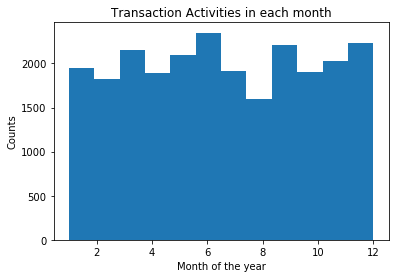

In [25]:
plt.hist(df["SALE MONTH"], bins=12)
plt.xlabel("Month of the year")
plt.ylabel("Counts")
plt.title("Transaction Activities in each month")

should we bin the ages? let's take a look of the ages

Text(0.5, 1.0, 'Age of the property')

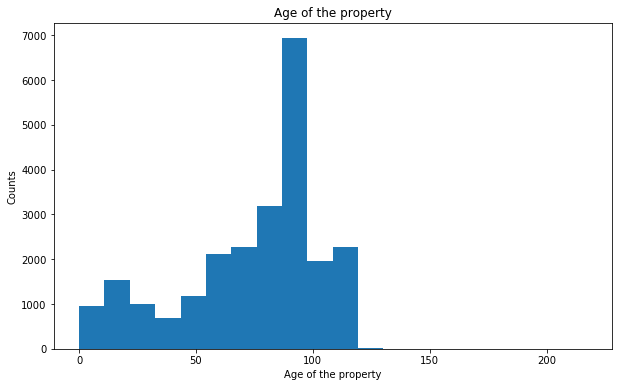

In [26]:
plt.figure(figsize=(10,6))
plt.hist(df["AGE"], bins=20)
plt.xlabel("Age of the property")
plt.ylabel("Counts")
plt.title("Age of the property")

In [27]:
df["AGE"].value_counts()

97.0     1902
92.0     1574
87.0     1476
96.0     1073
107.0     976
         ... 
74.0        1
146.0       1
217.0       1
216.0       1
125.0       1
Name: AGE, Length: 133, dtype: int64

Text(0.5, 1.0, 'SALE PRICE of the properties')

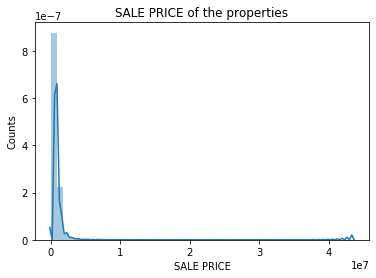

In [28]:
sns.distplot(df["SALE PRICE"])
plt.xlabel("SALE PRICE")
plt.ylabel("Counts")
plt.title("SALE PRICE of the properties")

In [78]:
df[df["SALE PRICE"]>10000000]["BOROUGH"].value_counts()

1    36
3     3
5     1
2     1
Name: BOROUGH, dtype: int64

In [30]:
df[df["SALE PRICE"]>=10000000].groupby("BOROUGH")["ZIP CODE"].value_counts()

BOROUGH  ZIP CODE
1        10021.0     7
         10014.0     5
         10065.0     5
         10011.0     4
         10003.0     3
         10012.0     3
         10023.0     3
         10024.0     3
         10028.0     2
         10128.0     1
2        10456.0     1
3        11201.0     2
         11215.0     1
5        10307.0     1
Name: ZIP CODE, dtype: int64

### **It shows that the properties valued above $10million are mostly in Manhattan**

In [31]:
df[(df["SALE PRICE"]<=10000000) & (df["SALE PRICE"]>5000000)]["BOROUGH"].value_counts()

1    60
3    26
4     5
2     1
Name: BOROUGH, dtype: int64

In [32]:
df[(df["SALE PRICE"]<=10000000) & (df["SALE PRICE"]>5000000)].groupby("BOROUGH")["ZIP CODE"].value_counts()

BOROUGH  ZIP CODE
1        10024.0      9
         10014.0      8
         10128.0      7
         10065.0      6
         10011.0      5
         10028.0      5
         10003.0      4
         10012.0      3
         10021.0      3
         10025.0      3
         10022.0      2
         10013.0      1
         10016.0      1
         10017.0      1
         10018.0      1
         10023.0      1
2        10471.0      1
3        11201.0     14
         11215.0      5
         11217.0      2
         11205.0      1
         11210.0      1
         11223.0      1
         11229.0      1
         11231.0      1
4        11101.0      3
         11355.0      1
         11435.0      1
Name: ZIP CODE, dtype: int64

### Brooklyn, especially zip code 11201, has some properties in the range of 5million to 10million

Text(0.5, 1.0, 'SALE PRICE up to 10 million')

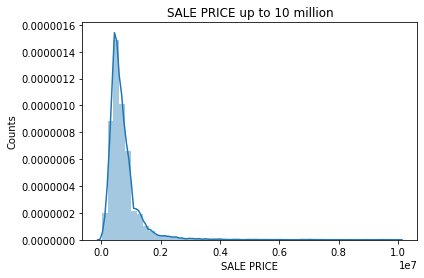

In [33]:
sns.distplot(df[df["SALE PRICE"]<10000000]["SALE PRICE"])
plt.xlabel("SALE PRICE")
plt.ylabel("Counts")
plt.title("SALE PRICE up to 10 million")

In [34]:
print("price min:", df["SALE PRICE"].min())
print("price min:", df["SALE PRICE"].max())

price min: 10000.0
price min: 43500000.0


In [35]:
df[df["SALE PRICE"]==df["SALE PRICE"].max()]

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,...,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,SALE MONTH,BUILDING CLASS NUMBER,AGE
124,1,SOHO,02 TWO FAMILY DWELLINGS,1,499,6,S2,102 GREENE STREET,,10012.0,...,2500.0,7000.0,1910.0,1,S2,43500000.0,2017-04-24 00:00:00,4,83.2,107.0


### Wow, this must be a fabulous property. will look it up on Zillow

First take a peek of the correlation of the numerical data

In [36]:
df.corr()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,SALE MONTH,BUILDING CLASS NUMBER,AGE
BOROUGH,1.000000,0.065429,0.014877,-0.102777,-0.297972,-0.060812,-0.302905,0.241432,-0.278670,0.353214,NaN,-0.213939,0.005745,-0.124007,-0.353403
BLOCK,0.065429,1.000000,0.028085,0.513774,-0.165777,-0.046027,-0.171325,0.083487,-0.188513,0.027241,NaN,-0.185749,0.016111,-0.090362,-0.027260
LOT,0.014877,0.028085,1.000000,-0.097205,-0.074723,-0.031146,-0.079703,0.101462,-0.017279,0.105632,NaN,-0.023660,0.004984,-0.045767,-0.105678
ZIP CODE,-0.102777,0.513774,-0.097205,1.000000,0.073061,0.026865,0.076994,-0.123829,-0.041223,-0.311898,NaN,-0.000585,0.007874,0.033476,0.311983
RESIDENTIAL UNITS,-0.297972,-0.165777,-0.074723,0.073061,1.000000,0.020700,0.970974,-0.129545,0.505638,-0.091597,NaN,0.109909,-0.007325,0.220324,0.091656
COMMERCIAL UNITS,-0.060812,-0.046027,-0.031146,0.026865,0.020700,1.000000,0.257025,-0.063934,0.186238,-0.074720,NaN,0.084069,-0.005340,0.960387,0.074724
TOTAL UNITS,-0.302905,-0.171325,-0.079703,0.076994,0.970974,0.257025,1.000000,-0.140903,0.532913,-0.106954,NaN,0.126572,-0.008250,0.444404,0.107012
LAND SQUARE FEET,0.241432,0.083487,0.101462,-0.123829,-0.129545,-0.063934,-0.140903,1.000000,0.155141,0.076786,NaN,0.028815,0.014557,-0.109451,-0.077076
GROSS SQUARE FEET,-0.278670,-0.188513,-0.017279,-0.041223,0.505638,0.186238,0.532913,0.155141,1.000000,0.015362,NaN,0.429484,-0.011458,0.278031,-0.015274
YEAR BUILT,0.353214,0.027241,0.105632,-0.311898,-0.091597,-0.074720,-0.106954,0.076786,0.015362,1.000000,NaN,-0.131809,-0.005863,-0.086830,-0.999883


In [37]:
del df["TAX CLASS AT TIME OF SALE"] 
# This data set has this column of in 1 as it was segemented from the original dataset

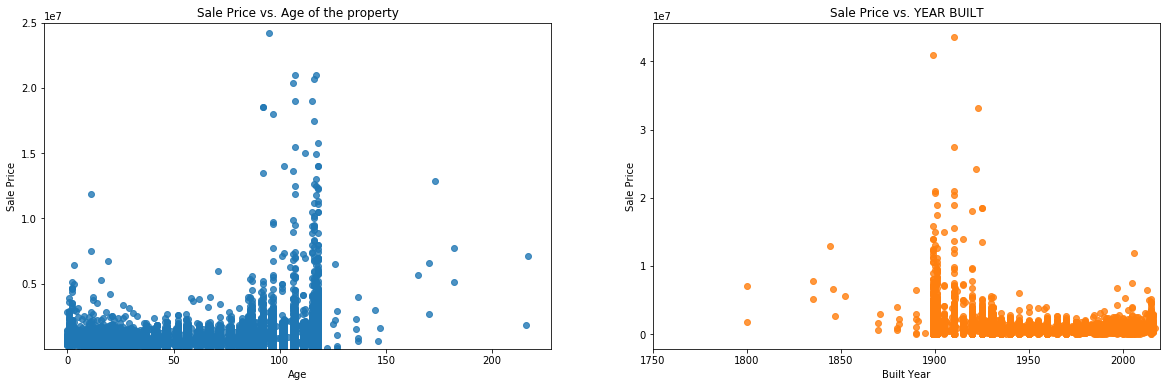

In [74]:
fig = plt.figure(figsize=(20,6)) # create figure

ax1 = fig.add_subplot(1,2,1) # add subplot 1 (1 row, 2 columns, first plot)
ax2 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1:
sns.regplot(x="AGE", y="SALE PRICE", data=df, fit_reg=False, ax=ax1)
ax1.set_title('Sale Price vs. Age of the property')
ax1.set_ylabel('Sale Price')
ax1.set_xlabel('Age')
ax1.set_ylim([10000, 25000000])

# Subplot 2:
sns.regplot(x="YEAR BUILT", y="SALE PRICE", data=df, fit_reg=False, ax=ax2)
ax2.set_title ('Sale Price vs. YEAR BUILT')
ax2.set_ylabel('Sale Price')
ax2.set_xlabel('Built Year')
ax2.set_xlim([1750,2020])

plt.show()

### "Age" or "YEAR BUILT" has some correlation  the "SALE PRICE", not linear for sure

In [39]:
df[["AGE", "SALE PRICE"]].corr()

,AGE,SALE PRICE
AGE,1.000000,0.132203
SALE PRICE,0.132203,1.000000


In [40]:
df[["YEAR BUILT", "SALE PRICE"]].corr()

,YEAR BUILT,SALE PRICE
YEAR BUILT,1.000000,-0.131809
SALE PRICE,-0.131809,1.000000


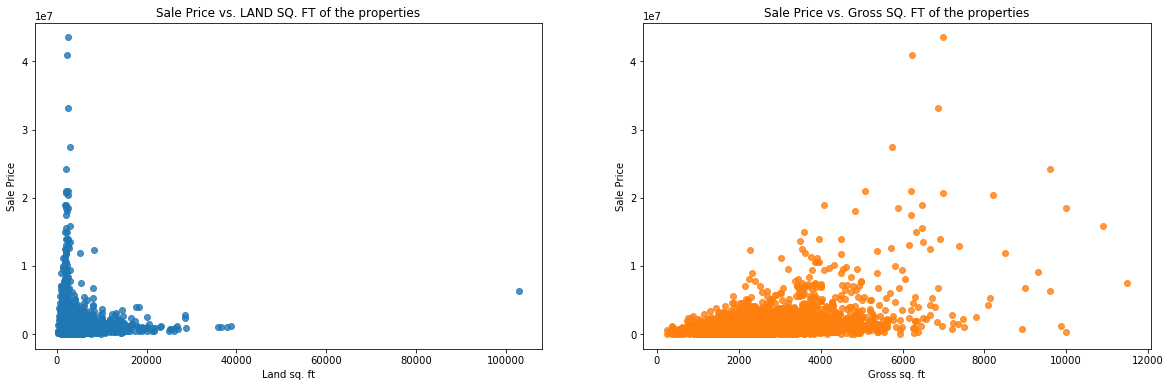

In [41]:
fig = plt.figure(figsize=(20,6)) # create figure

ax1 = fig.add_subplot(1,2,1) # add subplot 1 (1 row, 2 columns, first plot)
ax2 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1:
sns.regplot(x="LAND SQUARE FEET", y="SALE PRICE", data=df, fit_reg=False, ax=ax1)
ax1.set_title('Sale Price vs. LAND SQ. FT of the properties')
ax1.set_ylabel('Sale Price')
ax1.set_xlabel('Land sq. ft')

# Subplot 2:
sns.regplot(x="GROSS SQUARE FEET", y="SALE PRICE", data=df, fit_reg=False, ax=ax2)
ax2.set_title ('Sale Price vs. Gross SQ. FT of the properties')
ax2.set_ylabel('Sale Price')
ax2.set_xlabel('Gross sq. ft')
#ax2.set_xlim([1750,2020])

plt.show()

In [42]:
df[["LAND SQUARE FEET", "SALE PRICE"]].corr()

,LAND SQUARE FEET,SALE PRICE
LAND SQUARE FEET,1.000000,0.028815
SALE PRICE,0.028815,1.000000


In [43]:
df[["GROSS SQUARE FEET", "SALE PRICE"]].corr()

,GROSS SQUARE FEET,SALE PRICE
GROSS SQUARE FEET,1.000000,0.429484
SALE PRICE,0.429484,1.000000


### "LAND SQUARE FEET" is very weakly correlated to "SALE PRICE", while "GROSS SQUARE FEET" is little bit more correlated to the "SALE PRICE". However, there are many missing data in "GROSS SQUARE FEET" which were replaced with the median in the neighborhood. 

The unit number should be treated more like categorical data.

Categorical variables using boxplot

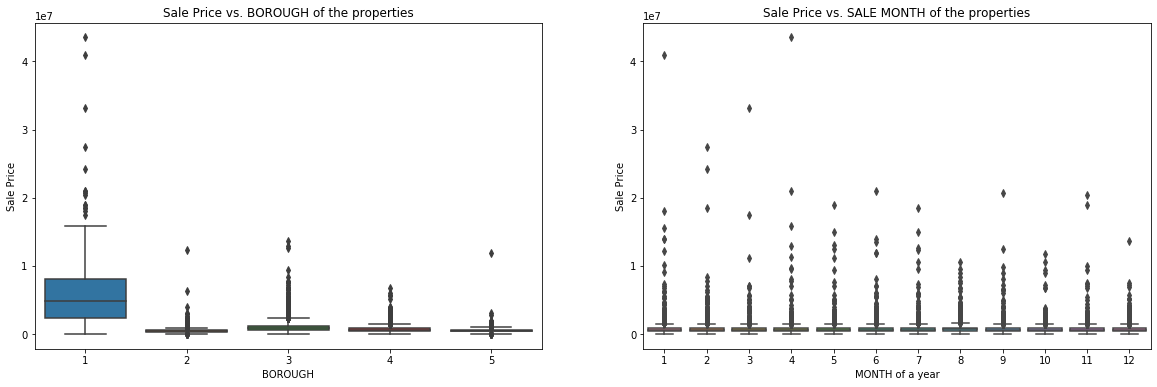

In [44]:
fig = plt.figure(figsize=(20,6)) # create figure

ax1 = fig.add_subplot(1,2,1) # add subplot 1 (1 row, 2 columns, first plot)
ax2 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1:
sns.boxplot(x="BOROUGH", y="SALE PRICE", data=df, ax=ax1)
ax1.set_title('Sale Price vs. BOROUGH of the properties')
ax1.set_ylabel('Sale Price')
ax1.set_xlabel("BOROUGH")

# Subplot 2:
sns.boxplot(x="SALE MONTH", y="SALE PRICE", data=df, ax=ax2)
ax2.set_title ('Sale Price vs. SALE MONTH of the properties')
ax2.set_ylabel('Sale Price')
ax2.set_xlabel('MONTH of a year')
#ax2.set_xlim([1750,2020])

plt.show()

### sale prices in Manhattan is way more higher than other boroughs. The other boroughs are almost the same."SALE MONTH" has no effect on "SALE PRICE"

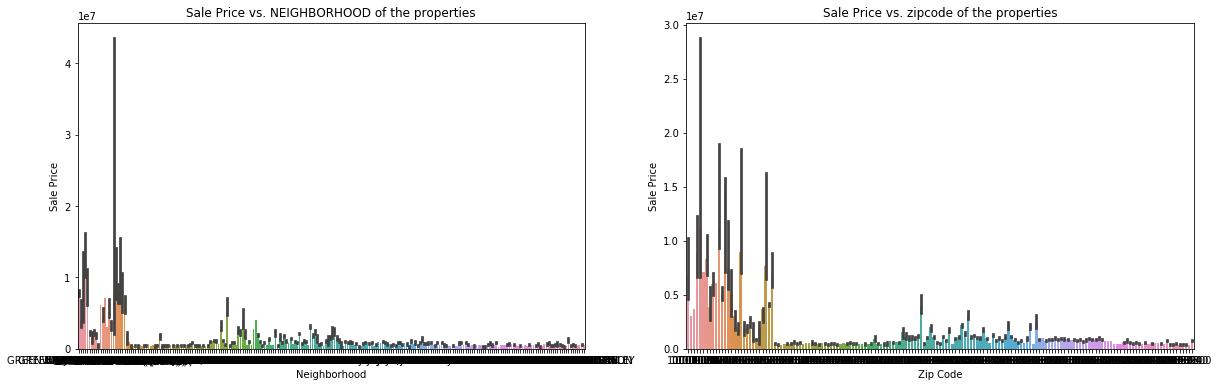

In [45]:
from numpy import median
fig = plt.figure(figsize=(20,6)) # create figure

ax1 = fig.add_subplot(1,2,1) # add subplot 1 (1 row, 2 columns, first plot)
ax2 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1:
sns.barplot(x="NEIGHBORHOOD", y="SALE PRICE", data=df, ax=ax1, estimator=median)
ax1.set_title('Sale Price vs. NEIGHBORHOOD of the properties')
ax1.set_ylabel('Sale Price')
ax1.set_xlabel("Neighborhood")

# Subplot 2:
sns.barplot(x="ZIP CODE", y="SALE PRICE", data=df, ax=ax2, estimator=median)
ax2.set_title ('Sale Price vs. zipcode of the properties')
ax2.set_ylabel('Sale Price')
ax2.set_xlabel('Zip Code')
#ax2.set_xlim([1750,2020])

plt.show()

### _different neighborhood does have impact on the sale price. We will keep "ZIP CODE" as a variable for "SALE PRICE"_

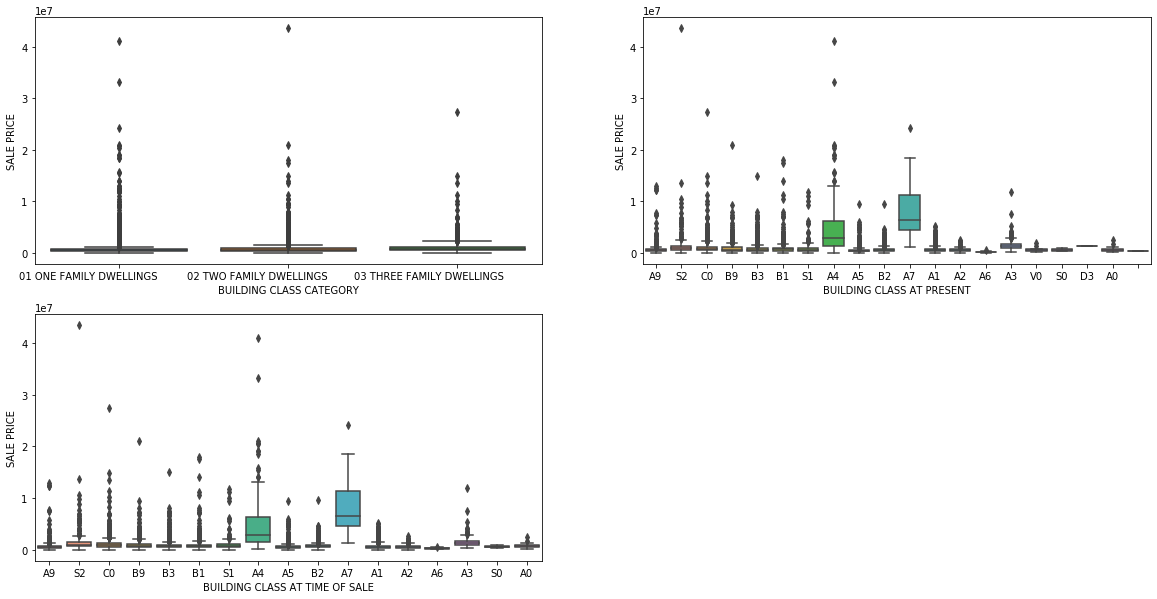

In [46]:
fig = plt.figure(figsize=(20,10)) # create figure

((ax1, ax2),(ax3, ax4))=fig.subplots(2,2)

# Subplot 1:
sns.boxplot(x="BUILDING CLASS CATEGORY", y="SALE PRICE", data=df, ax=ax1)

# Subplot 2:
sns.boxplot(x="BUILDING CLASS AT PRESENT", y="SALE PRICE", data=df,ax=ax2)

# Subplot 3:
sns.boxplot(x="BUILDING CLASS AT TIME OF SALE", y="SALE PRICE", data=df, ax=ax3)

fig.delaxes(ax4)
plt.show()

"BUILDING CLASS CATEGORY" does not show any indication of "SALE PRICE". However, "BUILDING CLASS AT RESENT" and "BUILDING CLASS AT TIME OF SALE" do differentiate "SALE PRICE". A4(CITY residence one family) and A3(Large suburban residence ) do stand out from the crowds. Since the target is sale price, "BUILDING CLASS AT TIME OF SALE" will be a potential variable. 

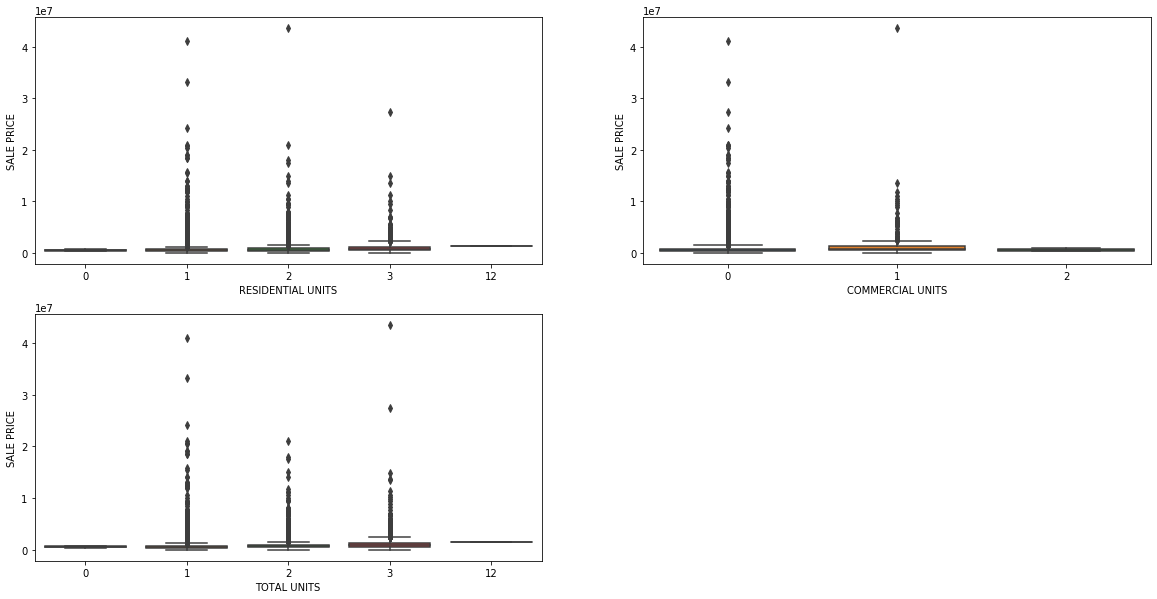

In [47]:
fig = plt.figure(figsize=(20,10)) # create figure

((ax1, ax2),(ax3, ax4))=fig.subplots(2,2)

# Subplot 1:
sns.boxplot(x="RESIDENTIAL UNITS", y="SALE PRICE", data=df, ax=ax1)

# Subplot 2:
sns.boxplot(x="COMMERCIAL UNITS", y="SALE PRICE", data=df,ax=ax2)

# Subplot 3:
sns.boxplot(x="TOTAL UNITS", y="SALE PRICE", data=df, ax=ax3)

fig.delaxes(ax4)
plt.show()

"RESIDENTIAL UNITS", "COMMERCIAL UNITS" and "TOTAL UNITS"  have no impact on "SALE PRICE. 

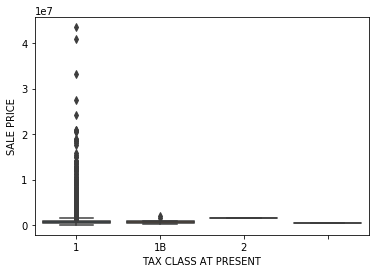

In [48]:
sns.boxplot(x="TAX CLASS AT PRESENT", y="SALE PRICE", data=df)

Not a predictor for "SALE PRICE"

### In summary, 
1. The columns _"BOROUGH"_, _"NEIGHBORHOOD"_, _"ZIP CODE"_, _"BUILDING CLASS AT TIME OF SALE"_ could be potential categorical predictors for "SALE PRICE". 
2. _"GROSS SQUARE FEET"_ and _"Age"_ could be a potential continuous variable for "SALE PRICE". 
3. Real estate price is all about location, location... Since location is a categorical variable, it is better use classification for "SALE PRICE". That is the practice realtors use also. Quite often, realtors estimate a house based on the value of houses nearby and in the same category. I will bin the "SALE PRICE" for the classification.

In [49]:
print("Sale price min:", df["SALE PRICE"].min())
print("Sale price max:", df["SALE PRICE"].max())

Sale price min: 10000.0
Sale price max: 43500000.0


In [50]:
df.shape

(24158, 22)

_Use quantile bins_

In [51]:
#first tried q=10, the fitting acc, acc=0.2911, is low and the confusion matrix shows too much spreading
pd.qcut(df["SALE PRICE"], q=4, precision=1)#.value_counts()

0        (860000.0, 43500000.0]
1        (860000.0, 43500000.0]
2        (860000.0, 43500000.0]
3        (860000.0, 43500000.0]
4        (860000.0, 43500000.0]
                  ...          
24153      (430000.0, 600000.0]
24154      (600000.0, 860000.0]
24155      (430000.0, 600000.0]
24156      (430000.0, 600000.0]
24157      (430000.0, 600000.0]
Name: SALE PRICE, Length: 24158, dtype: category
Categories (4, interval[float64]): [(9999.9, 430000.0] < (430000.0, 600000.0] < (600000.0, 860000.0] < (860000.0, 43500000.0]]

In [52]:
df["SALE PRICE QUANTILE"]=pd.qcut(df["SALE PRICE"], q=4, precision=2, labels=[0,1,2,3])

## **Conclusion:**
1. The columns _"BOROUGH"_ and _"NEIGHBORHOOD"_ all contain in the _"ZIP CODE"_. _"ZIP CODE"_ will be used because they are numerical.
2. _"BUILDING CLASS NUMBER"_ will be another potential categorical predictors for "SALE PRICE QUANTILE". 
3. _"GROSS SQUARE FEET"_ and _"AGE"_ could be the potential continuous variable for "SALE PRICE QUANTILE".

# **Data modeling**
Since most of the independent variables are categorical, I find regression is a little misleading. KNN Classification looks more appropriate for this problem. 

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24158 entries, 0 to 24157
Data columns (total 23 columns):
BOROUGH                           24158 non-null int64
NEIGHBORHOOD                      24158 non-null object
BUILDING CLASS CATEGORY           24158 non-null object
TAX CLASS AT PRESENT              24158 non-null object
BLOCK                             24158 non-null int64
LOT                               24158 non-null int64
BUILDING CLASS AT PRESENT         24158 non-null object
ADDRESS                           24158 non-null object
APARTMENT NUMBER                  24158 non-null object
ZIP CODE                          24158 non-null float64
RESIDENTIAL UNITS                 24158 non-null int64
COMMERCIAL UNITS                  24158 non-null int64
TOTAL UNITS                       24158 non-null int64
LAND SQUARE FEET                  24158 non-null float64
GROSS SQUARE FEET                 24158 non-null float64
YEAR BUILT                        24158 non-null float

In [54]:
from sklearn import preprocessing
import itertools
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

### To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array:

In [55]:
# feature array, 
X = df[["ZIP CODE", "BUILDING CLASS NUMBER", "GROSS SQUARE FEET", "AGE"]].values
X[0:5]

array([[10011. ,    65.9,  3855. ,   115. ],
       [10011. ,    83.2,  4978. ,    97. ],
       [10011. ,    67. ,  3725. ,   116. ],
       [10009. ,    83.2,  3360. ,   117. ],
       [10003. ,    83.2,  5920. ,   118. ]])

In [56]:
y = df["SALE PRICE QUANTILE"].astype("int").values
y[0:5]

array([3, 3, 3, 3, 3])

### Normalize Data

In [57]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-2.16949667, -0.14199153,  2.34400398,  1.30527621],
       [-2.16949667,  5.9390443 ,  3.69936962,  0.72665736],
       [-2.16949667,  0.24466392,  2.18710502,  1.3374217 ],
       [-2.1738023 ,  5.9390443 ,  1.74658101,  1.36956719],
       [-2.18671917,  5.9390443 ,  4.83628363,  1.40171268]])

### Train Test Split  
Out of Sample Accuracy is the percentage of correct predictions that the model makes on data that that the model has NOT been trained on. Doing a train and test on the same dataset will most likely have low out-of-sample accuracy, due to the likelihood of being over-fit.

It is important that our models have a high, out-of-sample accuracy, because the purpose of any model, of course, is to make correct predictions on unknown data. So how can we improve out-of-sample accuracy? One way is to use an evaluation approach called Train/Test Split.
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. 

This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

In [58]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (19326, 4) (19326,)
Test set: (4832, 4) (4832,)


<div id="classification">
    <h2>Classification</h2>
</div>

<h3>K nearestneighbor (KNN)</h3>

#### Import library 
Classifier implementing the k-nearest neighbors vote.

#### What about K?
K in KNN, is the number of nearest neighbors to examine. It is supposed to be specified by the User. So, how can we choose right value for K?
The general solution is to reserve a part of your data for testing the accuracy of the model. Then chose k =1, use the training part for modeling, and calculate the accuracy of prediction using all samples in your test set. Repeat this process, increasing the k, and see which k is the best for your model.

We can calculate the accuracy of KNN for different Ks.

In [59]:
Ks = 50
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
#ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.49565397, 0.45384934, 0.5057947 , 0.51572848, 0.52193709,
       0.51945364, 0.52690397, 0.53104305, 0.52938742, 0.53083609,
       0.53373344, 0.53331954, 0.53807947, 0.53538907, 0.54014901,
       0.54159768, 0.53745861, 0.53600993, 0.53766556, 0.53621689,
       0.53600993, 0.53745861, 0.53580298, 0.53600993, 0.5339404 ,
       0.5397351 , 0.5370447 , 0.53621689, 0.53414735, 0.53683775,
       0.53828642, 0.53725166, 0.53683775, 0.53683775, 0.53476821,
       0.53828642, 0.53476821, 0.53352649, 0.53062914, 0.53207781,
       0.53145695, 0.53187086, 0.53228477, 0.53207781, 0.52938742,
       0.52980132, 0.52980132, 0.52897351, 0.53145695])

In [60]:
std_acc

array([0.00719267, 0.00716224, 0.00719246, 0.00718938, 0.00718602,
       0.0071875 , 0.00718252, 0.00717907, 0.00718051, 0.00717925,
       0.00717655, 0.00717695, 0.00717205, 0.0071749 , 0.00716971,
       0.00716801, 0.00717273, 0.00717426, 0.0071725 , 0.00717405,
       0.00717426, 0.00717273, 0.00717448, 0.00717426, 0.00717635,
       0.00717019, 0.00717317, 0.00717405, 0.00717615, 0.00717339,
       0.00717182, 0.00717295, 0.00717339, 0.00717339, 0.00717553,
       0.00717182, 0.00717553, 0.00717675, 0.00717943, 0.00717812,
       0.00717869, 0.00717831, 0.00717793, 0.00717812, 0.00718051,
       0.00718015, 0.00718015, 0.00718086, 0.00717869])

#### Plot  model accuracy  for Different number of Neighbors 

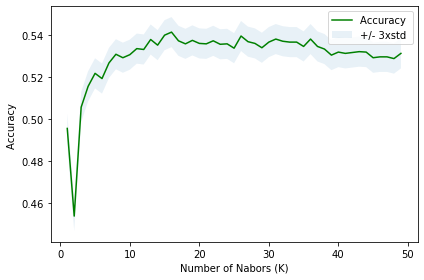

In [61]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [62]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.5415976821192053 with k= 16


In [69]:
from matplotlib.ticker import NullFormatter

In [70]:
neigh = KNeighborsClassifier(n_neighbors = 18).fit(X_train,y_train)
yhat=neigh.predict(X_test)
print("acc:", metrics.accuracy_score(y_test, yhat))

acc: 0.5360099337748344


In [71]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.54      0.50      0.52      1219
           1       0.47      0.43      0.45      1222
           2       0.48      0.48      0.48      1171
           3       0.63      0.74      0.68      1220

   micro avg       0.54      0.54      0.54      4832
   macro avg       0.53      0.54      0.53      4832
weighted avg       0.53      0.54      0.53      4832

Normalized confusion matrix
[[0.5  0.27 0.13 0.1 ]
 [0.29 0.43 0.18 0.1 ]
 [0.11 0.18 0.48 0.23]
 [0.03 0.04 0.19 0.74]]


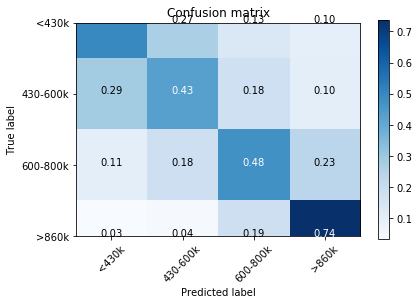

In [76]:
# Compute confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1,2,3])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["<430k","430-600k","600-800k", ">860k"],\
                      normalize= True,  title='Confusion matrix')

<h1 align=center><font size = 5>Condominiums Data Visulization and modeling</font></h1> 


In [2]:
df=pd.read_csv("condos.csv")
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,SALE MONTH,BUILDING CLASS NUMBER
0,0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,...,5,1633,6440,1900.0,2,C2,6625000.0,2017-07-19 00:00:00,7,67.2
1,1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,...,10,2272,6794,1913.0,2,C4,3936272.0,2016-09-23 00:00:00,9,67.4
2,2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,...,6,2369,4615,1900.0,2,C2,8000000.0,2016-11-17 00:00:00,11,67.2
3,3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,,...,8,1750,4226,1920.0,2,C4,3192840.0,2016-09-23 00:00:00,9,67.4
4,4,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,,...,24,4489,18523,1920.0,2,D9,16232000.0,2016-11-07 00:00:00,11,68.9


In [3]:
del df["Unnamed: 0"]

## Data Inspection

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30863 entries, 0 to 30862
Data columns (total 22 columns):
BOROUGH                           30863 non-null int64
NEIGHBORHOOD                      30863 non-null object
BUILDING CLASS CATEGORY           30863 non-null object
TAX CLASS AT PRESENT              30863 non-null object
BLOCK                             30863 non-null int64
LOT                               30863 non-null int64
BUILDING CLASS AT PRESENT         30863 non-null object
ADDRESS                           30863 non-null object
APARTMENT NUMBER                  30863 non-null object
ZIP CODE                          30863 non-null float64
RESIDENTIAL UNITS                 30863 non-null int64
COMMERCIAL UNITS                  30863 non-null int64
TOTAL UNITS                       30863 non-null int64
LAND SQUARE FEET                  30863 non-null object
GROSS SQUARE FEET                 30863 non-null object
YEAR BUILT                        27261 non-null float64

In [5]:
#first change "GROSS SQUARE FEET" to numeric
df["GROSS SQUARE FEET"] = pd.to_numeric(df["GROSS SQUARE FEET"], errors='coerce')
df["GROSS SQUARE FEET"].isnull().sum()

20590

In [6]:
df[df["GROSS SQUARE FEET"]==0].shape

(7971, 22)

In [7]:
df["GROSS SQUARE FEET"].replace(0, np.nan, inplace=True)
df["GROSS SQUARE FEET"].isnull().sum()

28561

In [8]:
df["LAND SQUARE FEET"] = pd.to_numeric(df["LAND SQUARE FEET"], errors='coerce')
df["LAND SQUARE FEET"].isnull().sum()

20333

In [9]:
df[df["LAND SQUARE FEET"]==0].shape

(7742, 22)

In [10]:
df["LAND SQUARE FEET"].replace(0, np.nan, inplace=True)
df["LAND SQUARE FEET"].isnull().sum()

28075

In [11]:
df[df["YEAR BUILT"]==0].shape

(0, 22)

In [12]:
#df["YEAR BUILT"].replace(0, np.nan, inplace=True)
df["YEAR BUILT"].isnull().sum()

3602

### _Most "LAND SQUARE FEET" and "GROSS SQUARE FEET" are empty. Will not use these two columns even if they are relevant in family_dwellings analysis._

## Missing values replacement

### replace missing values
1.YEAR BUILT: replace with the most frequent year in the same neighborhood

In [13]:
# tried groupby "NEIGHBORHOOD" and "BUILDING CLASS CATEGORY", or just "NEIGHBORHOOD" only and failed both on 
# value_counts().idxmax() and median(). That means some neighborhoods with "YEAR BUILT" are all NAN
#df["YEAR BUILT"] =df[["NEIGHBORHOOD", "YEAR BUILT" ]].\
#                       groupby(["NEIGHBORHOOD"]).\
#                        transform(lambda x: x.fillna(x.value_counts().idxmax()))

In [14]:
df["YEAR BUILT"] =df[["BOROUGH","BUILDING CLASS CATEGORY", "YEAR BUILT" ]].\
                       groupby(["BOROUGH","BUILDING CLASS CATEGORY"]).\
                        transform(lambda x: x.fillna(x.value_counts().idxmax()))
df["YEAR BUILT"].isnull().sum()

0

In [15]:
df_test =df["ZIP CODE"].value_counts().to_frame("counts")
df_test[df_test["counts"]<3].sum()

counts    1
dtype: int64

In [16]:
df[df["ZIP CODE"].isin(df_test[df_test["counts"]<3].index.to_list())].shape

(1, 22)

In [17]:
#df[df["ZIP CODE"].isin(df_test[df_test["counts"]<3].index.to_list())].to_csv("commercial_nonactivezipcode.csv")

In [18]:
#df.drop(df[df["ZIP CODE"].isin(df_test[df_test["counts"]<3].index.to_list())].index, axis=0, inplace=True)
#df.shape

### _Add one column "AGE"_

In [19]:
dateTime = pd.to_datetime(df["SALE DATE"])
print(type(dateTime))
dateTime

<class 'pandas.core.series.Series'>


0       2017-07-19
1       2016-09-23
2       2016-11-17
3       2016-09-23
4       2016-11-07
           ...    
30858   2016-10-31
30859   2016-10-20
30860   2016-12-29
30861   2016-10-13
30862   2017-01-04
Name: SALE DATE, Length: 30863, dtype: datetime64[ns]

In [20]:
df["AGE"]= dateTime.dt.year - df["YEAR BUILT"]

In [21]:
df.isnull().any()

BOROUGH                           False
NEIGHBORHOOD                      False
BUILDING CLASS CATEGORY           False
TAX CLASS AT PRESENT              False
BLOCK                             False
LOT                               False
BUILDING CLASS AT PRESENT         False
ADDRESS                           False
APARTMENT NUMBER                  False
ZIP CODE                          False
RESIDENTIAL UNITS                 False
COMMERCIAL UNITS                  False
TOTAL UNITS                       False
LAND SQUARE FEET                   True
GROSS SQUARE FEET                  True
YEAR BUILT                        False
TAX CLASS AT TIME OF SALE         False
BUILDING CLASS AT TIME OF SALE    False
SALE PRICE                        False
SALE DATE                         False
SALE MONTH                        False
BUILDING CLASS NUMBER             False
AGE                               False
dtype: bool

## Data Visualization

In [22]:
df. describe(include="all")

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,...,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,SALE MONTH,BUILDING CLASS NUMBER,AGE
count,30863.000000,30863,30863,30863,30863.000000,30863.000000,30863,30863,30863,30863.000000,...,2.788000e+03,2.302000e+03,30863.000000,30863.000000,30863,3.086300e+04,30863,30863.000000,30863.000000,30863.000000
unique,NaN,238,15,10,NaN,NaN,47,22564,2751,NaN,...,NaN,NaN,NaN,NaN,37,NaN,286,NaN,NaN,NaN
top,NaN,UPPER EAST SIDE (59-79),10 COOPS - ELEVATOR APARTMENTS,2,NaN,NaN,D4,131-05 40TH ROAD,,NaN,...,NaN,NaN,NaN,NaN,D4,NaN,2017-06-29 00:00:00,NaN,NaN,NaN
freq,NaN,1402,11454,25427,NaN,NaN,11245,208,18406,NaN,...,NaN,NaN,NaN,NaN,11247,NaN,243,NaN,NaN,NaN
mean,2.362084,NaN,NaN,NaN,2800.379354,649.510968,NaN,NaN,NaN,10664.839905,...,7.632444e+03,1.851288e+04,1962.966011,1.943589,NaN,1.563474e+06,NaN,6.521142,75.133941,53.708486
std,1.315805,NaN,NaN,NaN,2715.142959,803.870437,NaN,NaN,NaN,607.758640,...,8.330555e+04,9.343119e+04,36.561612,0.230717,NaN,5.464185e+06,NaN,3.393615,7.212050,36.553254
min,1.000000,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,10001.000000,...,3.300000e+01,1.500000e+02,1800.000000,1.000000,NaN,1.000000e+04,NaN,1.000000,67.100000,0.000000
25%,1.000000,NaN,NaN,NaN,1010.000000,23.000000,NaN,NaN,NaN,10023.000000,...,2.050000e+03,3.360000e+03,1930.000000,2.000000,NaN,3.400000e+05,NaN,4.000000,68.400000,11.000000
50%,3.000000,NaN,NaN,NaN,1556.000000,120.000000,NaN,NaN,NaN,10466.000000,...,2.523000e+03,5.105000e+03,1960.000000,2.000000,NaN,6.913910e+05,NaN,6.000000,68.400000,57.000000
75%,4.000000,NaN,NaN,NaN,4414.000000,1120.000000,NaN,NaN,NaN,11235.000000,...,4.021000e+03,1.011700e+04,2005.000000,2.000000,NaN,1.375000e+06,NaN,9.000000,82.400000,86.000000


The above shows many interesting facts:
1. Most transaction activities are in Upper East(59-79) with frequency 1397
2. Most transactions are Coops-Elevator Apartments with frequency 11453
3. Lot is a sub-division of Block. Really not much information here
3. The transactions are on many addresses. At 131-05 40th road there are 208 transactions
4. The most frequent transaction date is 2017-06-29 with frequency 241. Comparing with family dwellings, transactions of condos happens more after college students graduation.

In [23]:
df["BOROUGH"].value_counts()

1    13392
3     7483
4     7324
2     1852
5      812
Name: BOROUGH, dtype: int64

In [24]:
df[["BOROUGH", "SALE PRICE"]].groupby("BOROUGH").median()

,SALE PRICE
BOROUGH,
1,1150000.0
2,217075.0
3,743999.0
4,324000.0
5,297250.0


In [27]:
df[["BOROUGH", "AGE"]].groupby("BOROUGH").median()

,AGE
BOROUGH,
1,57.0
2,62.0
3,52.0
4,60.0
5,33.0


### ***Interesting facts:***
| **Borough** | **Manhattan** | **Bronx** | **Brooklyn** | **Queens** | **Staten Island** |
|----------|-----|------ |---|---|---|
| **Transaction Units** | 13392 | 1852 | 7483 | 7324 | 812 |
| **Median price(in US dollar)** | 1,150,000 | 217,075 | 743,999 | 324,000 | 297,250 |
| **Number of units(Price above 100 million)**|5|0|1|1|0|
| **Number of units(Price between 50 to 100 million)**|19|3|3|1|0|
| **Number of units(Price between 10 to 50 million)**|455|28|52|36|0|
| **Number of units(Price between 5 to 10 million)**|920|51|80|14|4|

**Manhattan has the most condo transactions**

In [25]:
df["SALE MONTH"].value_counts()

6     3271
5     2797
9     2720
12    2696
3     2684
8     2571
7     2511
1     2489
11    2359
10    2271
2     2251
4     2243
Name: SALE MONTH, dtype: int64

In [26]:
#df[["BOROUGH", "BLOCK", "LOT", "ZIP CODE"]] = df[["BOROUGH", "BLOCK", "LOT", "ZIP CODE"]].astype("category")
#del df["APARTMENT NUMBER"]
#del df["ADDRESS"]

In [27]:
# just for reference
BoroghNames =["MANHATTAN", "BRONX", "BROOKLYN", "QUEENS", "STATEN ISLAND"]

Text(0.5, 1.0, 'Transaction Activities in each month')

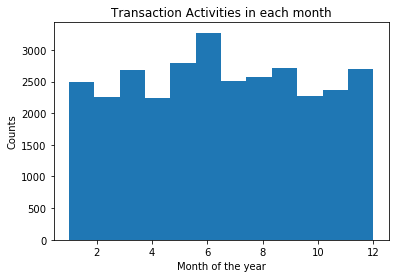

In [28]:
plt.hist(df["SALE MONTH"], bins=12)
plt.xlabel("Month of the year")
plt.ylabel("Counts")
plt.title("Transaction Activities in each month")

should we bin the ages? let's take a look of the ages

Text(0.5, 1.0, 'Age of the property')

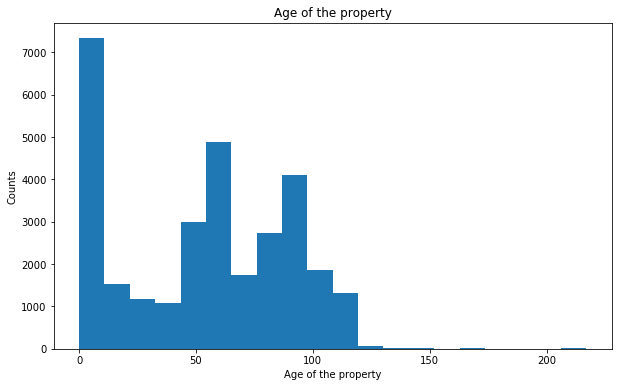

In [29]:
plt.figure(figsize=(10,6))
plt.hist(df["AGE"], bins=20)
plt.xlabel("Age of the property")
plt.ylabel("Counts")
plt.title("Age of the property")

Text(0.5, 1.0, 'SALE PRICE of the properties')

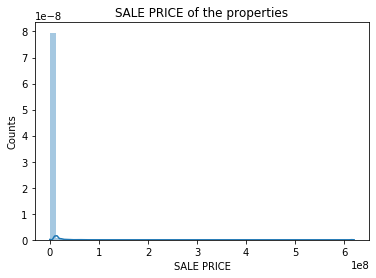

In [30]:
sns.distplot(df["SALE PRICE"])
plt.xlabel("SALE PRICE")
plt.ylabel("Counts")
plt.title("SALE PRICE of the properties")

In [31]:
df[df["SALE PRICE"]>100000000]["BOROUGH"].value_counts()

1    5
4    1
3    1
Name: BOROUGH, dtype: int64

In [32]:
df[(df["SALE PRICE"]>5000000) & (df["SALE PRICE"]<=10000000)]["BOROUGH"].value_counts()

1    920
3     80
2     51
4     14
5      4
Name: BOROUGH, dtype: int64

In [33]:
df[df["SALE PRICE"]>=10000000].groupby("BOROUGH")["ZIP CODE"].value_counts()

BOROUGH  ZIP CODE
1        10013.0     60
         10011.0     55
         10022.0     32
         10010.0     25
         10014.0     22
                     ..
4        11417.0      2
         11423.0      2
         11103.0      1
         11106.0      1
         11432.0      1
Name: ZIP CODE, Length: 93, dtype: int64

### **It shows that the properties valued above $10million are mostly in Manhattan**

In [34]:
df[(df["SALE PRICE"]<=10000000) & (df["SALE PRICE"]>5000000)].groupby("BOROUGH")["ZIP CODE"].value_counts()

BOROUGH  ZIP CODE
1        10013.0     132
         10007.0      76
         10011.0      76
         10024.0      58
         10010.0      56
                    ... 
4        11432.0       1
5        10302.0       1
         10307.0       1
         10309.0       1
         10314.0       1
Name: ZIP CODE, Length: 94, dtype: int64

### Again, Manhattan has the most condos in the range of 5million to 10million

Text(0.5, 1.0, 'SALE PRICE up to 10 million')

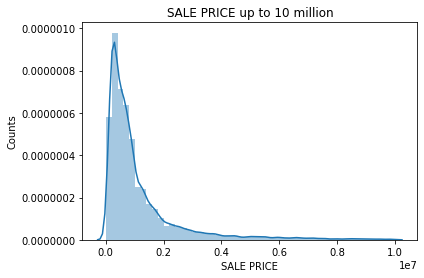

In [35]:
sns.distplot(df[df["SALE PRICE"]<10000000]["SALE PRICE"])
plt.xlabel("SALE PRICE")
plt.ylabel("Counts")
plt.title("SALE PRICE up to 10 million")

In [36]:
print("price min:", df["SALE PRICE"].min())
print("price min:", df["SALE PRICE"].max())

price min: 10000.0
price min: 620000000.0


In [37]:
df[df["SALE PRICE"]==df["SALE PRICE"].max()]

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,...,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,SALE MONTH,BUILDING CLASS NUMBER,AGE
4548,1,KIPS BAY,08 RENTALS - ELEVATOR APARTMENTS,2,934,1,D6,460-520 2ND AVENUE,,10016.0,...,141836.0,829024.0,1975.0,2,D6,620000000.0,2016-12-08 00:00:00,12,68.6,41.0


### Wow, this penthouse is remarkable. will look it up on Zillow

First take a peek of the correlation of the numerical data

In [38]:
df.corr()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,SALE MONTH,BUILDING CLASS NUMBER,AGE
BOROUGH,1.000000,0.519561,-0.089821,0.882698,-0.009043,-0.005237,-0.009057,0.024689,-0.055110,0.134517,-0.254414,-0.146591,0.000735,-0.037699,-0.134705
BLOCK,0.519561,1.000000,-0.118226,0.548180,-0.001140,0.000019,-0.001128,0.039989,0.016734,0.055899,-0.202375,-0.123997,0.011167,-0.135796,-0.056127
LOT,-0.089821,-0.118226,1.000000,-0.098140,-0.038037,-0.074869,-0.039181,-0.000737,0.010248,0.497924,-0.080600,0.028479,-0.009945,0.732771,-0.497758
ZIP CODE,0.882698,0.548180,-0.098140,1.000000,-0.009776,0.001120,-0.009653,-0.015053,-0.081541,0.119532,-0.098863,-0.136443,-0.000570,-0.062601,-0.119632
RESIDENTIAL UNITS,-0.009043,-0.001140,-0.038037,-0.009776,1.000000,0.493385,0.999841,0.687301,0.905554,-0.033323,0.014674,0.397148,0.019609,-0.049371,0.033085
COMMERCIAL UNITS,-0.005237,0.000019,-0.074869,0.001120,0.493385,1.000000,0.508810,0.363848,0.446155,-0.095067,0.023512,0.281550,0.007188,-0.009702,0.095046
TOTAL UNITS,-0.009057,-0.001128,-0.039181,-0.009653,0.999841,0.508810,1.000000,0.688200,0.906252,-0.034929,0.015005,0.398839,0.019555,-0.049062,0.034692
LAND SQUARE FEET,0.024689,0.039989,-0.000737,-0.015053,0.687301,0.363848,0.688200,1.000000,0.908437,0.052203,0.009004,0.051820,0.004778,-0.016138,-0.052038
GROSS SQUARE FEET,-0.055110,0.016734,0.010248,-0.081541,0.905554,0.446155,0.906252,0.908437,1.000000,0.126696,0.018256,0.273277,0.027892,-0.039000,-0.126904
YEAR BUILT,0.134517,0.055899,0.497924,0.119532,-0.033323,-0.095067,-0.034929,0.052203,0.126696,1.000000,-0.155460,-0.010861,-0.012367,0.563952,-0.999918


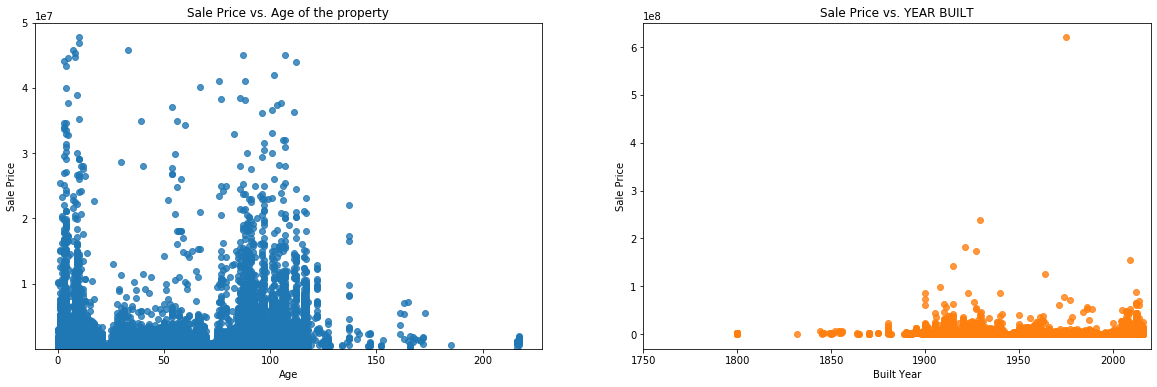

In [39]:
fig = plt.figure(figsize=(20,6)) # create figure

ax1 = fig.add_subplot(1,2,1) # add subplot 1 (1 row, 2 columns, first plot)
ax2 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1:
sns.regplot(x="AGE", y="SALE PRICE", data=df, fit_reg=False, ax=ax1)
ax1.set_title('Sale Price vs. Age of the property')
ax1.set_ylabel('Sale Price')
ax1.set_xlabel('Age')
ax1.set_ylim([1000, 50000000])

# Subplot 2:
sns.regplot(x="YEAR BUILT", y="SALE PRICE", data=df, fit_reg=False, ax=ax2)
ax2.set_title ('Sale Price vs. YEAR BUILT')
ax2.set_ylabel('Sale Price')
ax2.set_xlabel('Built Year')
ax2.set_xlim([1750,2020])

plt.show()

### "Age" or "YEAR BUILT" has some correlation  the "SALE PRICE", not linear for sure

In [40]:
df[["AGE", "SALE PRICE"]].corr()

,AGE,SALE PRICE
AGE,1.000000,0.010671
SALE PRICE,0.010671,1.000000


In [41]:
df[["YEAR BUILT", "SALE PRICE"]].corr()

,YEAR BUILT,SALE PRICE
YEAR BUILT,1.000000,-0.010861
SALE PRICE,-0.010861,1.000000


### _Categorical variables_

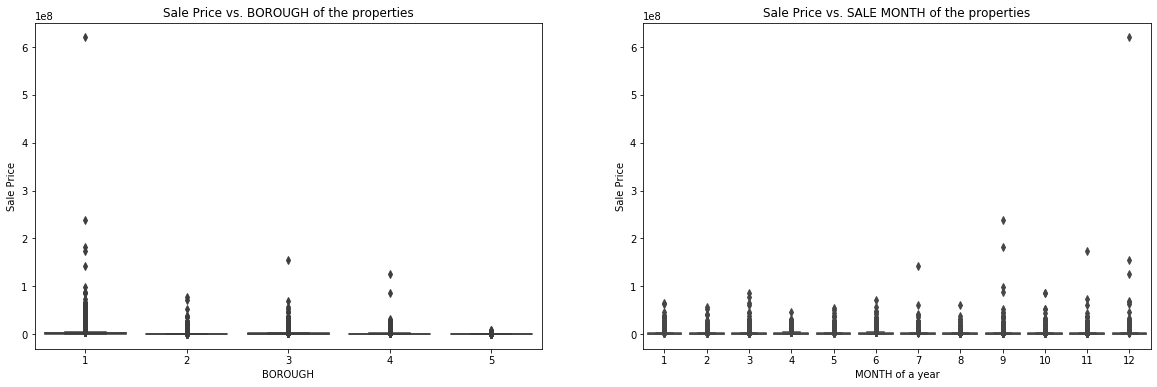

In [42]:
fig = plt.figure(figsize=(20,6)) # create figure

ax1 = fig.add_subplot(1,2,1) # add subplot 1 (1 row, 2 columns, first plot)
ax2 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1:
sns.boxplot(x="BOROUGH", y="SALE PRICE", data=df, ax=ax1)
ax1.set_title('Sale Price vs. BOROUGH of the properties')
ax1.set_ylabel('Sale Price')
ax1.set_xlabel("BOROUGH")

# Subplot 2:
sns.boxplot(x="SALE MONTH", y="SALE PRICE", data=df, ax=ax2)
ax2.set_title ('Sale Price vs. SALE MONTH of the properties')
ax2.set_ylabel('Sale Price')
ax2.set_xlabel('MONTH of a year')
#ax2.set_xlim([1750,2020])

plt.show()

### sale prices in Manhattan is way more higher than other boroughs. The other boroughs are almost the same. "SALE MONTH" does not have impact on the price

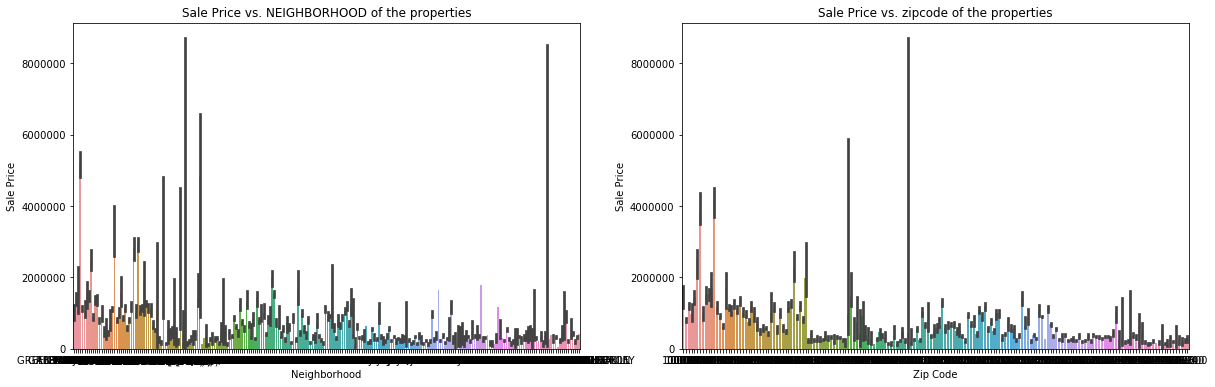

In [43]:
from numpy import median
fig = plt.figure(figsize=(20,6)) # create figure

ax1 = fig.add_subplot(1,2,1) # add subplot 1 (1 row, 2 columns, first plot)
ax2 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1:
sns.barplot(x="NEIGHBORHOOD", y="SALE PRICE", data=df, ax=ax1, estimator=median)
ax1.set_title('Sale Price vs. NEIGHBORHOOD of the properties')
ax1.set_ylabel('Sale Price')
ax1.set_xlabel("Neighborhood")

# Subplot 2:
sns.barplot(x="ZIP CODE", y="SALE PRICE", data=df, ax=ax2, estimator=median)
ax2.set_title ('Sale Price vs. zipcode of the properties')
ax2.set_ylabel('Sale Price')
ax2.set_xlabel('Zip Code')
#ax2.set_xlim([1750,2020])

plt.show()

_different neighborhood does have impact on the sale price. We will keep "ZIP CODE" as a variable for "SALE PRICE"_

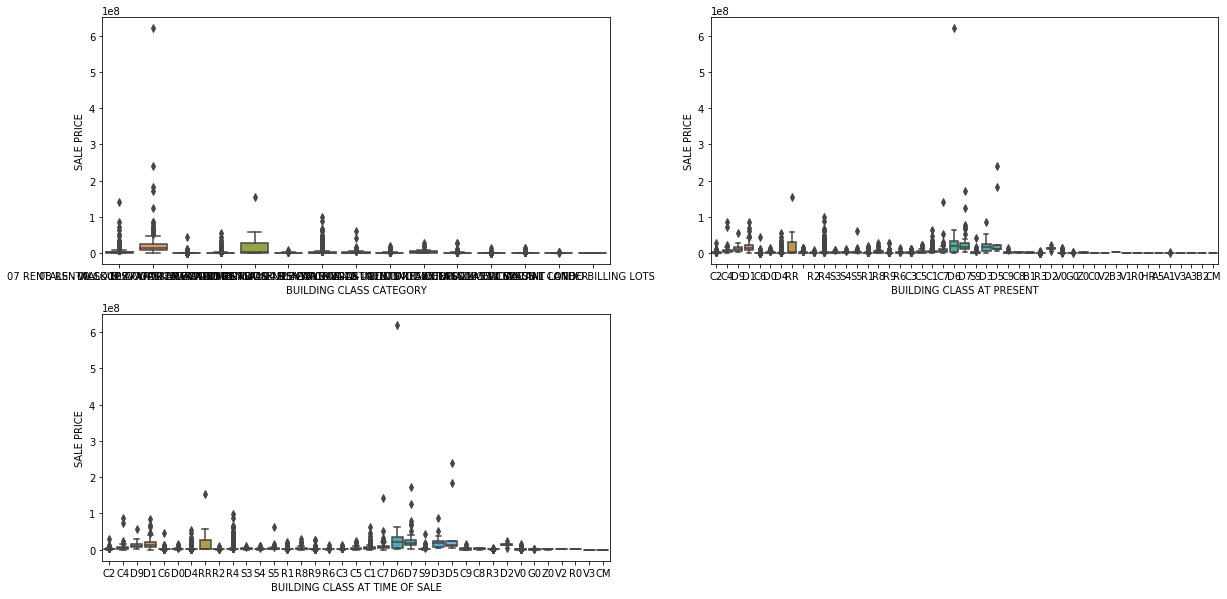

In [44]:
fig = plt.figure(figsize=(20,10)) # create figure

((ax1, ax2),(ax3, ax4))=fig.subplots(2,2)

# Subplot 1:
sns.boxplot(x="BUILDING CLASS CATEGORY", y="SALE PRICE", data=df, ax=ax1)

# Subplot 2:
sns.boxplot(x="BUILDING CLASS AT PRESENT", y="SALE PRICE", data=df,ax=ax2)

# Subplot 3:
sns.boxplot(x="BUILDING CLASS AT TIME OF SALE", y="SALE PRICE", data=df, ax=ax3)

fig.delaxes(ax4)
plt.show()

"BUILDING CLASS CATEGORY" does not show any indication of "SALE PRICE". However, "BUILDING CLASS AT RESENT" and "BUILDING CLASS AT TIME OF SALE" do differentiate "SALE PRICE" more. D1(CELEVATOR APT; SEMI-FIREPROOF WITHOUT STORES) and C7(WALK-UP APT. OVER SIX FAMILIES WITH STORES) do stand out from the crowds. Since the target is sale price, "BUILDING CLASS AT TIME OF SALE" will be a potential variable. 

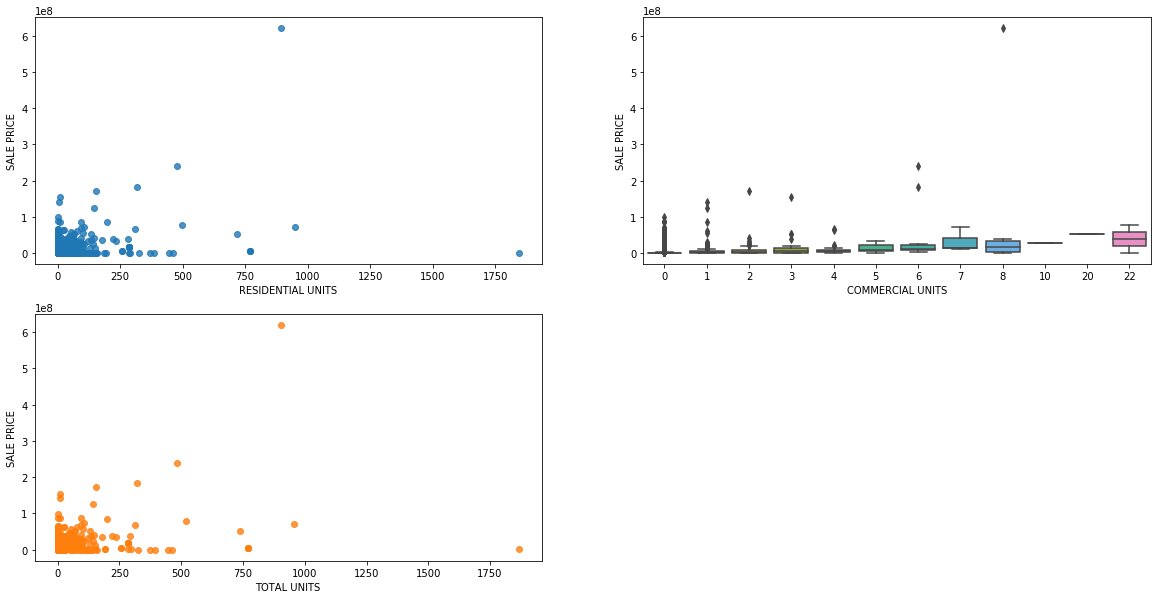

In [45]:
fig = plt.figure(figsize=(20,10)) # create figure

((ax1, ax2),(ax3, ax4))=fig.subplots(2,2)

# Subplot 1:
sns.regplot(x="RESIDENTIAL UNITS", y="SALE PRICE", data=df, fit_reg=False, ax=ax1)

# Subplot 2:
sns.boxplot(x="COMMERCIAL UNITS", y="SALE PRICE", data=df,ax=ax2)

# Subplot 3:
sns.regplot(x="TOTAL UNITS", y="SALE PRICE", data=df, fit_reg= False,ax=ax3)

fig.delaxes(ax4)
plt.show()

### "COMMERCIAL UNITS" does have impact on "SALE PRICE"

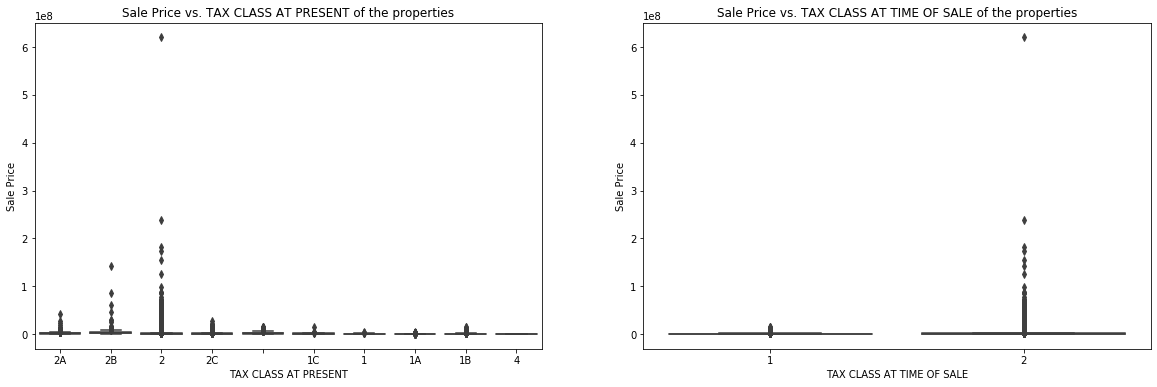

In [46]:
fig = plt.figure(figsize=(20,6)) # create figure

ax1 = fig.add_subplot(1,2,1) # add subplot 1 (1 row, 2 columns, first plot)
ax2 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1:
sns.boxplot(x="TAX CLASS AT PRESENT", y="SALE PRICE", data=df, ax=ax1)
ax1.set_title('Sale Price vs. TAX CLASS AT PRESENT of the properties')
ax1.set_ylabel('Sale Price')
ax1.set_xlabel("TAX CLASS AT PRESENT")

# Subplot 2:
sns.boxplot(x="TAX CLASS AT TIME OF SALE", y="SALE PRICE", data=df, ax=ax2)
ax2.set_title ('Sale Price vs. TAX CLASS AT TIME OF SALE of the properties')
ax2.set_ylabel('Sale Price')
ax2.set_xlabel('TAX CLASS AT TIME OF SALE')
#ax2.set_xlim([1750,2020])

plt.show()

"TAX CLASS AT TIME OF SALE", "TAX CLASS AT PRESENT" do have impact on "SALE PRICE". However, I think "BUILDING CLASS AT TIME OF SALE" has already "TAX CLASS AT PRESENT" embedded inside.

### In summary, 
1. The columns _"BOROUGH"_, _"NEIGHBORHOOD"_, _"ZIP CODE"_, _"BUILDING CLASS AT TIME OF SALE"_ could be potential categorical predictors for "SALE PRICE". 
2. "RESIDENTIAL UNITS" and "COMMERCIAL UNITS" could be potential predictors for "SALE PRICE".
3. _"Age"_ could be a potential continuous variable for "SALE PRICE". 
4. Real estate price is all about location, location... Since location is a categorical variable, it is better use classification for "SALE PRICE". That is the practice realtors use also. Quite often, realtors estimate a house based on the value of houses nearby and in the same category. I will bin the "SALE PRICE" for the classification.

In [47]:
print("Sale price min:", df["SALE PRICE"].min())
print("Sale price max:", df["SALE PRICE"].max())

Sale price min: 10000.0
Sale price max: 620000000.0


In [48]:
df.shape

(30863, 23)

_Use quantile bins_

In [49]:
pd.qcut(df["SALE PRICE"], q=4, precision=1)#.value_counts()

0        (1375000.0, 620000000.0]
1        (1375000.0, 620000000.0]
2        (1375000.0, 620000000.0]
3        (1375000.0, 620000000.0]
4        (1375000.0, 620000000.0]
                   ...           
30858        (340000.0, 691391.0]
30859          (9999.9, 340000.0]
30860        (340000.0, 691391.0]
30861        (340000.0, 691391.0]
30862          (9999.9, 340000.0]
Name: SALE PRICE, Length: 30863, dtype: category
Categories (4, interval[float64]): [(9999.9, 340000.0] < (340000.0, 691391.0] < (691391.0, 1375000.0] < (1375000.0, 620000000.0]]

In [50]:
df["SALE PRICE QUANTILE"]=pd.qcut(df["SALE PRICE"], q=4, precision=2, labels=[0,1,2,3])

## **Conclusion:**
1. The columns _"BOROUGH"_ and _"NEIGHBORHOOD"_ all contain in the _"ZIP CODE"_. _"ZIP CODE"_ will be used because they are numerical.
2. _"BUILDING CLASS NUMBER"_ will be another potential categorical predictors for "SALE PRICE". 
3. _"AGE"_ could be the potential continuous variable for "SALE PRICE".
4. "RESIDENTIAL UNITS" and "COMMERCIAL UNITS" will be potential predictors for "SALE PRICE".

# **Data modeling**
Since most of the independent variables are categorical, I find regression is a little misleading. KNN Classification looks more appropriate for this problem. 

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30863 entries, 0 to 30862
Data columns (total 24 columns):
BOROUGH                           30863 non-null int64
NEIGHBORHOOD                      30863 non-null object
BUILDING CLASS CATEGORY           30863 non-null object
TAX CLASS AT PRESENT              30863 non-null object
BLOCK                             30863 non-null int64
LOT                               30863 non-null int64
BUILDING CLASS AT PRESENT         30863 non-null object
ADDRESS                           30863 non-null object
APARTMENT NUMBER                  30863 non-null object
ZIP CODE                          30863 non-null float64
RESIDENTIAL UNITS                 30863 non-null int64
COMMERCIAL UNITS                  30863 non-null int64
TOTAL UNITS                       30863 non-null int64
LAND SQUARE FEET                  2788 non-null float64
GROSS SQUARE FEET                 2302 non-null float64
YEAR BUILT                        30863 non-null float64

In [52]:
#df[["BUILDING CLASS AT TIME OF SALE","BUILDING CLASS NUMBER"]]

In [53]:
df["BUILDING CLASS NUMBER"].value_counts()

68.40    11247
82.40    10210
67.60     2482
82.30     1079
82.10     1026
82.90     1012
82.20      647
67.30      557
86.00      465
67.10      407
67.20      378
68.00      207
67.70      183
82.60      149
83.90      112
68.10       95
67.50       90
83.30       88
67.40       87
83.40       66
83.50       53
68.70       41
71.00       40
82.80       37
68.30       25
82.82       18
68.60       13
68.90       10
68.50        9
67.90        9
90.00        6
67.80        6
68.20        5
86.20        1
67.77        1
82.00        1
86.30        1
Name: BUILDING CLASS NUMBER, dtype: int64

In [54]:
from sklearn import preprocessing
import itertools
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

### To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array:

In [55]:
# feature array, 
X = df[["ZIP CODE", "BUILDING CLASS NUMBER","AGE"]].values
X[0:5]

array([[10009. ,    67.2,   117. ],
       [10009. ,    67.4,   103. ],
       [10009. ,    67.2,   116. ],
       [10009. ,    67.4,    96. ],
       [10009. ,    68.9,    96. ]])

In [56]:
y = df["SALE PRICE QUANTILE"].astype("int").values
y[0:5]

array([3, 3, 3, 3, 3])

## Normalize Data

In [57]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-1.07912992, -1.10011293,  1.73151587],
       [-1.07912992, -1.07238111,  1.34850683],
       [-1.07912992, -1.10011293,  1.70415809],
       [-1.07912992, -1.07238111,  1.15700231],
       [-1.07912992, -0.86439251,  1.15700231]])

### Train Test Split  
Out of Sample Accuracy is the percentage of correct predictions that the model makes on data that that the model has NOT been trained on. Doing a train and test on the same dataset will most likely have low out-of-sample accuracy, due to the likelihood of being over-fit.

It is important that our models have a high, out-of-sample accuracy, because the purpose of any model, of course, is to make correct predictions on unknown data. So how can we improve out-of-sample accuracy? One way is to use an evaluation approach called Train/Test Split.
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. 

This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

In [58]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (24690, 3) (24690,)
Test set: (6173, 3) (6173,)


<div id="classification">
    <h2>Classification</h2>
</div>

<h3>K nearestneighbor (KNN)</h3>

#### Import library 
Classifier implementing the k-nearest neighbors vote.

#### What about K?
K in KNN, is the number of nearest neighbors to examine. It is supposed to be specified by the User. So, how can we choose right value for K?
The general solution is to reserve a part of your data for testing the accuracy of the model. Then chose k =1, use the training part for modeling, and calculate the accuracy of prediction using all samples in your test set. Repeat this process, increasing the k, and see which k is the best for your model.

We can calculate the accuracy of KNN for different Ks.

In [59]:
Ks = 50
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
#ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.58399482, 0.57071116, 0.59663049, 0.60473028, 0.60910416,
       0.61396404, 0.61445002, 0.61299206, 0.60797019, 0.61396404,
       0.60910416, 0.60861818, 0.60699822, 0.60246234, 0.59776446,
       0.59501053, 0.59501053, 0.59306658, 0.59258059, 0.59339057,
       0.59112263, 0.59209461, 0.58723473, 0.58431881, 0.58512879,
       0.5848048 , 0.58610076, 0.5844808 , 0.58674874, 0.58221286,
       0.5848048 , 0.58626276, 0.58691074, 0.58561477, 0.58934068,
       0.58043091, 0.58253685, 0.58318484, 0.58496679, 0.58253685,
       0.58172688, 0.58140288, 0.5807549 , 0.58269885, 0.5844808 ,
       0.58043091, 0.57929694, 0.57881095, 0.57783898])

In [60]:
std_acc

array([0.00627344, 0.00629992, 0.0062439 , 0.00622271, 0.00621052,
       0.00619637, 0.00619492, 0.00619925, 0.00621373, 0.00619637,
       0.00621052, 0.0062119 , 0.00621646, 0.00622882, 0.00624104,
       0.00624793, 0.00624793, 0.00625267, 0.00625384, 0.00625188,
       0.0062573 , 0.006255  , 0.00626627, 0.00627274, 0.00627096,
       0.00627167, 0.00626881, 0.00627238, 0.00626737, 0.00627726,
       0.00627167, 0.00626845, 0.006267  , 0.00626989, 0.00626146,
       0.006281  , 0.00627657, 0.00627519, 0.00627132, 0.00627657,
       0.00627829, 0.00627897, 0.00628033, 0.00627623, 0.00627238,
       0.006281  , 0.00628334, 0.00628433, 0.00628629])

#### Plot  model accuracy  for Different number of Neighbors 

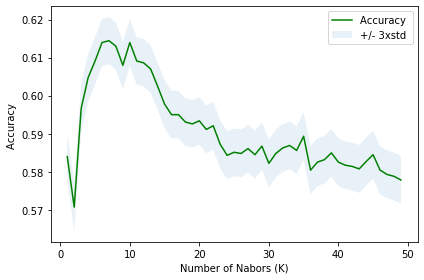

In [61]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [62]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.6144500242993682 with k= 7


### Include "RESIDENTIAL UNITS" and "COMMERCIAL UNITS" as features

In [63]:
# feature array, 
X1 = df[["ZIP CODE", "BUILDING CLASS NUMBER","RESIDENTIAL UNITS", "COMMERCIAL UNITS","AGE"]].values
X1[0:5]

array([[1.0009e+04, 6.7200e+01, 5.0000e+00, 0.0000e+00, 1.1700e+02],
       [1.0009e+04, 6.7400e+01, 1.0000e+01, 0.0000e+00, 1.0300e+02],
       [1.0009e+04, 6.7200e+01, 6.0000e+00, 0.0000e+00, 1.1600e+02],
       [1.0009e+04, 6.7400e+01, 8.0000e+00, 0.0000e+00, 9.6000e+01],
       [1.0009e+04, 6.8900e+01, 2.4000e+01, 0.0000e+00, 9.6000e+01]])

In [64]:
y = df["SALE PRICE QUANTILE"].astype("int").values
y[0:5]

array([3, 3, 3, 3, 3])

In [65]:
X1 = preprocessing.StandardScaler().fit(X1).transform(X1.astype(float))
X1[0:5]

array([[-1.07912992, -1.10011293,  0.16389283, -0.10344328,  1.73151587],
       [-1.07912992, -1.07238111,  0.42640137, -0.10344328,  1.34850683],
       [-1.07912992, -1.10011293,  0.21639454, -0.10344328,  1.70415809],
       [-1.07912992, -1.07238111,  0.32139795, -0.10344328,  1.15700231],
       [-1.07912992, -0.86439251,  1.16142527, -0.10344328,  1.15700231]])

In [66]:
X1_train, X1_test, y_train, y_test = train_test_split( X1, y, test_size=0.2, random_state=4)
print ('Train set:', X1_train.shape,  y_train.shape)
print ('Test set:', X1_test.shape,  y_test.shape)

Train set: (24690, 5) (24690,)
Test set: (6173, 5) (6173,)


In [67]:
Ks = 50
mean_acc1 = np.zeros((Ks-1))
std_acc1 = np.zeros((Ks-1))
#ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X1_train,y_train)
    yhat=neigh.predict(X1_test)
    mean_acc1[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc1[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc1

array([0.59420055, 0.57832496, 0.61056213, 0.61704196, 0.62157784,
       0.61979589, 0.6231978 , 0.62125385, 0.6191479 , 0.62254981,
       0.62044387, 0.62141584, 0.61817593, 0.61785194, 0.61266807,
       0.61493601, 0.61040013, 0.61040013, 0.60570225, 0.60651223,
       0.60651223, 0.60311032, 0.60554026, 0.59857444, 0.60311032,
       0.60181435, 0.60084238, 0.60327231, 0.5998704 , 0.60035639,
       0.59776446, 0.60035639, 0.60100437, 0.60165236, 0.60116637,
       0.59889843, 0.59727847, 0.5998704 , 0.60035639, 0.59792645,
       0.59954641, 0.59906042, 0.59501053, 0.59744047, 0.59922242,
       0.59695448, 0.59582051, 0.59695448, 0.59549652])

In [68]:
std_acc1

array([0.00624992, 0.00628531, 0.00620634, 0.00618707, 0.00617288,
       0.00617852, 0.00616768, 0.00617391, 0.00618055, 0.00616977,
       0.00617648, 0.0061734 , 0.00618357, 0.00618458, 0.00620021,
       0.00619346, 0.00620681, 0.00620681, 0.00622005, 0.00621781,
       0.00621781, 0.00622709, 0.00622049, 0.00623898, 0.00622709,
       0.00623054, 0.0062331 , 0.00622666, 0.00623564, 0.00623437,
       0.00624104, 0.00623437, 0.00623268, 0.00623097, 0.00623225,
       0.00623815, 0.00624227, 0.00623564, 0.00623437, 0.00624063,
       0.00623648, 0.00623773, 0.00624793, 0.00624186, 0.00623731,
       0.00624309, 0.00624592, 0.00624309, 0.00624673])

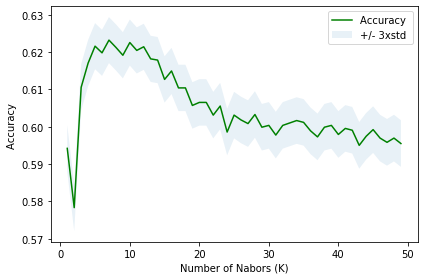

In [69]:
plt.plot(range(1,Ks),mean_acc1,'g')
plt.fill_between(range(1,Ks),mean_acc1 - 1 * std_acc1,mean_acc1 + 1 * std_acc1, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [70]:
print( "The best accuracy was with", mean_acc1.max(), "with k=", mean_acc1.argmax()+1) 

The best accuracy was with 0.6231977968572817 with k= 7


In [71]:
neigh = KNeighborsClassifier(n_neighbors = 7).fit(X1_train,y_train)
yhat=neigh.predict(X1_test)
print("acc:", metrics.accuracy_score(y_test, yhat))

acc: 0.6231977968572817


In [72]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.77      0.78      0.78      1575
           1       0.52      0.52      0.52      1502
           2       0.51      0.51      0.51      1565
           3       0.69      0.68      0.68      1531

   micro avg       0.62      0.62      0.62      6173
   macro avg       0.62      0.62      0.62      6173
weighted avg       0.62      0.62      0.62      6173

Confusion matrix, without normalization
[[1232  222   85   36]
 [ 290  775  337  100]
 [  60  365  805  335]
 [  18  132  346 1035]]


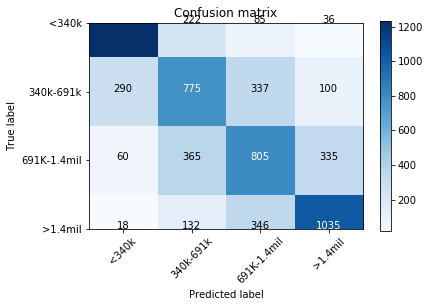

In [73]:
# Compute confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1,2,3])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["<340k","340k-691k","691K-1.4mil", ">1.4mil"],\
                      normalize= False,  title='Confusion matrix')

In [2]:
df=pd.read_csv("tax4.csv")
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,SALE MONTH,BUILDING CLASS NUMBER
0,143,1,ALPHABET CITY,22 STORE BUILDINGS,4,390,34,K4,115 AVENUE C,,...,1,1218,3586,1899.0,4,K4,3700000.0,2016-09-28 00:00:00,9,75.40
1,144,1,ALPHABET CITY,46 CONDO STORE BUILDINGS,4,384,1201,RK,310 EAST HOUSTON STREET,COM,...,1,-,-,2005.0,4,RK,10800000.0,2017-03-10 00:00:00,3,82.75
2,145,1,ALPHABET CITY,46 CONDO STORE BUILDINGS,4,397,1302,RK,250 EAST HOUSTON STREET,UNIT2,...,1,-,-,1989.0,4,RK,52625000.0,2016-10-19 00:00:00,10,82.75
3,762,1,CHELSEA,21 OFFICE BUILDINGS,4,692,63,O2,558 WEST 21ST STREET,,...,3,1360,4080,1900.0,4,O2,17300000.0,2017-06-30 00:00:00,6,79.20
4,763,1,CHELSEA,21 OFFICE BUILDINGS,4,790,32,O1,531-537 AVENUE OF THE AMER,,...,1,6468,14056,1953.0,4,O1,42400000.0,2017-04-18 00:00:00,4,79.10


In [3]:
del df["Unnamed: 0"]

## Data Inspection

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2347 entries, 0 to 2346
Data columns (total 22 columns):
BOROUGH                           2347 non-null int64
NEIGHBORHOOD                      2347 non-null object
BUILDING CLASS CATEGORY           2347 non-null object
TAX CLASS AT PRESENT              2347 non-null object
BLOCK                             2347 non-null int64
LOT                               2347 non-null int64
BUILDING CLASS AT PRESENT         2347 non-null object
ADDRESS                           2347 non-null object
APARTMENT NUMBER                  2347 non-null object
ZIP CODE                          2347 non-null float64
RESIDENTIAL UNITS                 2347 non-null int64
COMMERCIAL UNITS                  2347 non-null int64
TOTAL UNITS                       2347 non-null int64
LAND SQUARE FEET                  2347 non-null object
GROSS SQUARE FEET                 2347 non-null object
YEAR BUILT                        1869 non-null float64
TAX CLASS AT TIME

In [5]:
#first change "GROSS SQUARE FEET" to numeric
df["GROSS SQUARE FEET"] = pd.to_numeric(df["GROSS SQUARE FEET"], errors='coerce')
df["GROSS SQUARE FEET"].isnull().sum()

582

In [6]:
df[df["GROSS SQUARE FEET"]==0].shape

(430, 22)

In [7]:
df["GROSS SQUARE FEET"].replace(0, np.nan, inplace=True)
df["GROSS SQUARE FEET"].isnull().sum()

1012

In [8]:
df["LAND SQUARE FEET"] = pd.to_numeric(df["LAND SQUARE FEET"], errors='coerce')
df["LAND SQUARE FEET"].isnull().sum()

436

In [9]:
df[df["LAND SQUARE FEET"]==0].shape

(253, 22)

In [10]:
df["LAND SQUARE FEET"].replace(0, np.nan, inplace=True)
df["LAND SQUARE FEET"].isnull().sum()

689

In [11]:
df[df["YEAR BUILT"]==0].shape

(0, 22)

In [12]:
#df["YEAR BUILT"].replace(0, np.nan, inplace=True)
df["YEAR BUILT"].isnull().sum()

478

### _29% "LAND SQUARE FEET" and 44%"GROSS SQUARE FEET" are empty. 20% "YEAR BUILT" are NaN._

## Missing values replacement
Since there are so many missing values in all the three columns, would only replace the missing values in "YEAR BUILT" column.

### replace missing values
1.YEAR BUILT: replace with the most frequent year in the same neighborhood

In [13]:
# the following code failed b/c that some groups are all NaN
#df["YEAR BUILT"] =df[["BOROUGH","BUILDING CLASS CATEGORY", "YEAR BUILT" ]].\
#                       groupby(["BOROUGH","BUILDING CLASS CATEGORY"]).\
#                        transform(lambda x: x.fillna(x.value_counts().idxmax()))

In [14]:
df["YEAR BUILT"] =df[["BOROUGH","YEAR BUILT" ]].\
                       groupby(["BOROUGH"]).\
                       transform(lambda x: x.fillna(x.value_counts().idxmax()))
df["YEAR BUILT"].isnull().sum()

0

In [15]:
df["LAND SQUARE FEET"] =df[["BOROUGH", "LAND SQUARE FEET" ]].\
                       groupby(["BOROUGH"]).\
                        transform(lambda x: x.fillna(x.median()))
# "BUILDING CLASS CATEGORY",
df["LAND SQUARE FEET"].isnull().sum()

0

### _Add one column "AGE"_

In [16]:
dateTime = pd.to_datetime(df["SALE DATE"])
print(type(dateTime))
dateTime

<class 'pandas.core.series.Series'>


0      2016-09-28
1      2017-03-10
2      2016-10-19
3      2017-06-30
4      2017-04-18
          ...    
2342   2016-11-18
2343   2017-05-01
2344   2017-01-27
2345   2016-12-21
2346   2016-10-27
Name: SALE DATE, Length: 2347, dtype: datetime64[ns]

In [17]:
df["AGE"]= dateTime.dt.year - df["YEAR BUILT"]

In [18]:
df.isnull().any()

BOROUGH                           False
NEIGHBORHOOD                      False
BUILDING CLASS CATEGORY           False
TAX CLASS AT PRESENT              False
BLOCK                             False
LOT                               False
BUILDING CLASS AT PRESENT         False
ADDRESS                           False
APARTMENT NUMBER                  False
ZIP CODE                          False
RESIDENTIAL UNITS                 False
COMMERCIAL UNITS                  False
TOTAL UNITS                       False
LAND SQUARE FEET                  False
GROSS SQUARE FEET                  True
YEAR BUILT                        False
TAX CLASS AT TIME OF SALE         False
BUILDING CLASS AT TIME OF SALE    False
SALE PRICE                        False
SALE DATE                         False
SALE MONTH                        False
BUILDING CLASS NUMBER             False
AGE                               False
dtype: bool

## Data Visualization

In [19]:
df. describe(include="all")

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,...,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,SALE MONTH,BUILDING CLASS NUMBER,AGE
count,2347.000000,2347,2347,2347,2347.000000,2347.000000,2347,2347,2347,2347.000000,...,2.347000e+03,1.335000e+03,2347.000000,2347.0,2347,2.347000e+03,2347,2347.000000,2347.000000,2347.000000
unique,NaN,218,28,6,NaN,NaN,105,2020,481,NaN,...,NaN,NaN,NaN,NaN,99,NaN,254,NaN,NaN,NaN
top,NaN,FLUSHING-NORTH,22 STORE BUILDINGS,4,NaN,NaN,RB,39TH AVENUE,,NaN,...,NaN,NaN,NaN,NaN,RB,NaN,2016-12-22 00:00:00,NaN,NaN,NaN
freq,NaN,164,465,2319,NaN,NaN,234,27,1687,NaN,...,NaN,NaN,NaN,NaN,234,NaN,26,NaN,NaN,NaN
mean,2.903281,NaN,NaN,NaN,3551.048147,407.538134,NaN,NaN,NaN,10869.466127,...,1.690004e+04,2.349984e+04,1949.134214,4.0,NaN,9.318143e+06,NaN,6.523647,78.149770,67.518108
std,1.202627,NaN,NaN,NaN,3218.241490,651.141058,NaN,NaN,NaN,539.817094,...,1.417421e+05,8.792823e+04,35.844035,0.0,NaN,5.828502e+07,NaN,3.478434,5.602063,35.831756
min,1.000000,NaN,NaN,NaN,5.000000,1.000000,NaN,NaN,NaN,10001.000000,...,2.000000e+02,1.200000e+02,1800.000000,4.0,NaN,1.000000e+04,NaN,1.000000,69.100000,0.000000
25%,2.000000,NaN,NaN,NaN,1026.000000,19.000000,NaN,NaN,NaN,10310.000000,...,2.850000e+03,2.664500e+03,1930.000000,4.0,NaN,4.250000e+05,NaN,3.000000,73.500000,43.000000
50%,3.000000,NaN,NaN,NaN,2629.000000,49.000000,NaN,NaN,NaN,11206.000000,...,4.000000e+03,4.830000e+03,1931.000000,4.0,NaN,1.424835e+06,NaN,6.000000,79.100000,85.000000
75%,4.000000,NaN,NaN,NaN,5094.000000,1015.500000,NaN,NaN,NaN,11237.000000,...,7.124000e+03,1.208950e+04,1973.000000,4.0,NaN,4.115848e+06,NaN,9.000000,82.710000,87.000000


### The above shows many interesting facts:
1. Most transaction activities are in FLUSHING-NORTH with frequency 144
2. Most transactions are Store Building with frequency 426
3. Lot is a sub-division of Block. Really not much information here
4. The transactions are on many addresses. At 39th Ave, there are 27 transactions
5. The most frequent transaction date is 2016-06-29 with frequency 17. 

In [20]:
df["BOROUGH"].value_counts()

3    819
4    645
1    469
2    254
5    160
Name: BOROUGH, dtype: int64

In [21]:
df[["BOROUGH", "SALE PRICE"]].groupby("BOROUGH").median()

,SALE PRICE
BOROUGH,
1,4200000.0
2,1287500.0
3,1025000.0
4,1500000.0
5,644000.0


### ***Interesting facts:***
| **Borough** | **Manhattan** | **Bronx** | **Brooklyn** | **Queens** | **Staten Island** |
|----------|-----|------ |---|---|---|
| **Transaction Units** | 469 | 254 | 819 | 645 | 160 |
| **Median price(in US dollar)** | 4,200,000 | 1,287,500 | 1,025,000 | 1,500,000| 644,000 |
| **Number of units(priced >1billion)**|2|0|0|0|0|
| **Number of units(priced (100mil, 1billion])**|28|1|1|3|1|
| **Number of units(priced (50mil, 100mil])**|27|1|12|6|1|
**Brooklyn has the most condo transactions**

In [22]:
df["SALE MONTH"].value_counts()

6     246
9     232
12    225
3     215
1     198
5     195
11    191
4     182
7     178
2     177
10    168
8     140
Name: SALE MONTH, dtype: int64

In [23]:
#df[["BOROUGH", "BLOCK", "LOT", "ZIP CODE"]] = df[["BOROUGH", "BLOCK", "LOT", "ZIP CODE"]].astype("category")
#del df["APARTMENT NUMBER"]
#del df["ADDRESS"]

In [24]:
# just for reference
BoroghNames =["MANHATTAN", "BRONX", "BROOKLYN", "QUEENS", "STATEN ISLAND"]

Text(0.5, 1.0, 'Transaction Activities in each month')

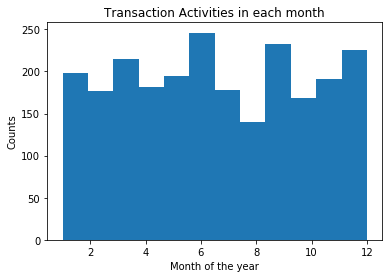

In [25]:
plt.hist(df["SALE MONTH"], bins=12)
plt.xlabel("Month of the year")
plt.ylabel("Counts")
plt.title("Transaction Activities in each month")

should we bin the ages? let's take a look of the ages

Text(0.5, 1.0, 'Age of the property')

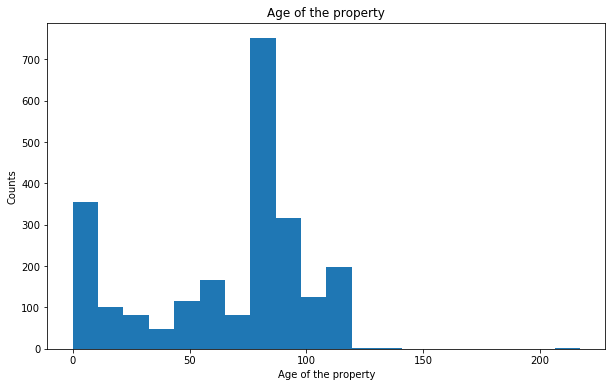

In [26]:
plt.figure(figsize=(10,6))
plt.hist(df["AGE"], bins=20)
plt.xlabel("Age of the property")
plt.ylabel("Counts")
plt.title("Age of the property")

Text(0.5, 1.0, 'SALE PRICE of the properties')

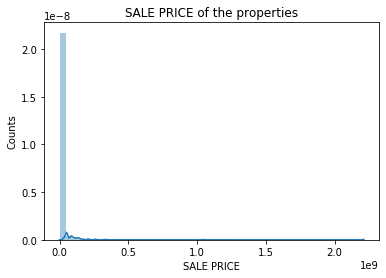

In [27]:
sns.distplot(df["SALE PRICE"])
plt.xlabel("SALE PRICE")
plt.ylabel("Counts")
plt.title("SALE PRICE of the properties")

In [28]:
df[df["SALE PRICE"]>1000000000]["BOROUGH"].value_counts()

1    2
Name: BOROUGH, dtype: int64

In [29]:
df[(df["SALE PRICE"]<=1000000000) & (df["SALE PRICE"]>100000000)]["BOROUGH"].value_counts()

1    28
3     6
4     3
5     1
2     1
Name: BOROUGH, dtype: int64

In [30]:
df[(df["SALE PRICE"]<=100000000) & (df["SALE PRICE"]>50000000)]["BOROUGH"].value_counts()

1    27
3    12
4     6
5     1
2     1
Name: BOROUGH, dtype: int64

In [31]:
df[(df["SALE PRICE"]<=50000000) & (df["SALE PRICE"]>10000000)]["BOROUGH"].value_counts()

1    99
3    59
4    33
2    17
5     4
Name: BOROUGH, dtype: int64

In [32]:
print(df["SALE PRICE"].min())
print(df["SALE PRICE"].max())

10000.0
2210000000.0


In [33]:
df[df["SALE PRICE"]==df["SALE PRICE"].max()]

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,...,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,SALE MONTH,BUILDING CLASS NUMBER,AGE
233,1,MIDTOWN CBD,21 OFFICE BUILDINGS,4,1301,1,O4,245 PARK AVENUE,,10167.0,...,81336.0,1586886.0,1966.0,4,O4,2.210000e+09,2017-05-05 00:00:00,5,79.4,51.0


In [34]:
#df[df["SALE PRICE"]>=10000000].groupby("BOROUGH")["ZIP CODE"].value_counts()

### **It shows that the properties valued above $100million are mostly in Manhattan**

In [35]:
#df[(df["SALE PRICE"]<=10000000) & (df["SALE PRICE"]>5000000)].groupby("BOROUGH")["ZIP CODE"].value_counts()

### Again, Manhattan has the most commercial properties in the range of 5million to 10million

Text(0.5, 1.0, 'SALE PRICE up to 10 million')

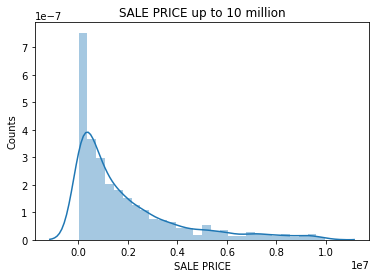

In [36]:
sns.distplot(df[df["SALE PRICE"]<10000000]["SALE PRICE"])
plt.xlabel("SALE PRICE")
plt.ylabel("Counts")
plt.title("SALE PRICE up to 10 million")

In [37]:
print("price min:", df["SALE PRICE"].min())
print("price min:", df["SALE PRICE"].max())

price min: 10000.0
price min: 2210000000.0


In [38]:
df[df["SALE PRICE"]==df["SALE PRICE"].max()]

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,...,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,SALE MONTH,BUILDING CLASS NUMBER,AGE
233,1,MIDTOWN CBD,21 OFFICE BUILDINGS,4,1301,1,O4,245 PARK AVENUE,,10167.0,...,81336.0,1586886.0,1966.0,4,O4,2.210000e+09,2017-05-05 00:00:00,5,79.4,51.0


### Wow, this is remarkable. will look it up on Zillow

First take a peek of the correlation of the numerical data

In [39]:
df.corr()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,SALE MONTH,BUILDING CLASS NUMBER,AGE
BOROUGH,1.000000,0.359761,-0.173956,0.670102,-0.031022,0.009535,-0.000881,0.097760,-0.159136,0.257893,NaN,-0.135176,-0.028137,-0.095366,-0.257654
BLOCK,0.359761,1.000000,-0.151811,0.499668,0.006237,0.029328,0.028212,-0.003070,-0.132491,0.064020,NaN,-0.098739,-0.052489,-0.082486,-0.063189
LOT,-0.173956,-0.151811,1.000000,-0.079915,-0.030957,-0.033990,-0.034055,-0.044762,-0.008346,0.316863,NaN,-0.063164,0.015435,0.457358,-0.316829
ZIP CODE,0.670102,0.499668,-0.079915,1.000000,-0.024548,0.009078,0.001455,-0.052243,-0.176522,0.245166,NaN,-0.125651,-0.038010,-0.073414,-0.244605
RESIDENTIAL UNITS,-0.031022,0.006237,-0.030957,-0.024548,1.000000,0.000967,0.280057,0.003482,0.160732,-0.008423,NaN,0.074780,0.023399,-0.037304,0.008204
COMMERCIAL UNITS,0.009535,0.029328,-0.033990,0.009078,0.000967,1.000000,0.960200,0.018317,0.053930,-0.011277,NaN,0.037277,0.024003,0.012589,0.010812
TOTAL UNITS,-0.000881,0.028212,-0.034055,0.001455,0.280057,0.960200,1.000000,0.018087,0.096818,-0.009483,NaN,0.056119,0.029645,0.006201,0.008975
LAND SQUARE FEET,0.097760,-0.003070,-0.044762,-0.052243,0.003482,0.018317,0.018087,1.000000,0.305760,0.003218,NaN,0.055714,-0.002340,0.015821,-0.003154
GROSS SQUARE FEET,-0.159136,-0.132491,-0.008346,-0.176522,0.160732,0.053930,0.096818,0.305760,1.000000,0.088664,NaN,0.813162,-0.001022,0.045121,-0.088438
YEAR BUILT,0.257893,0.064020,0.316863,0.245166,-0.008423,-0.011277,-0.009483,0.003218,0.088664,1.000000,NaN,-0.000899,-0.021217,0.107156,-0.999912


(0, 1000000)

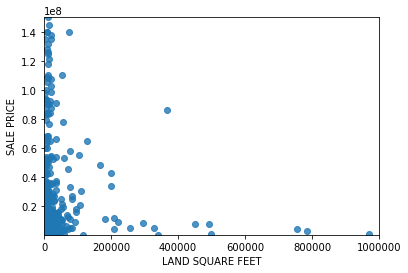

In [40]:
sns.regplot(x="LAND SQUARE FEET", y="SALE PRICE", data=df, fit_reg=False)
plt.ylim([10000, 150000000])
plt.xlim([0, 1000000])

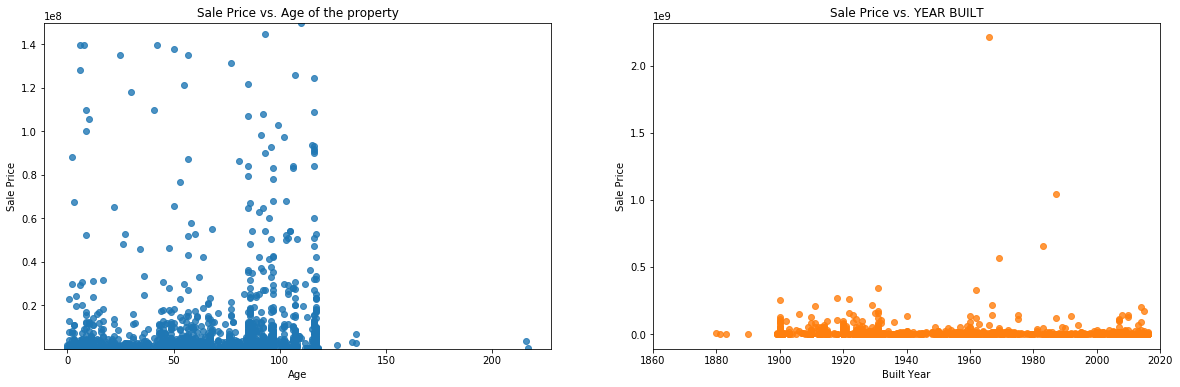

In [41]:
fig = plt.figure(figsize=(20,6)) # create figure

ax1 = fig.add_subplot(1,2,1) # add subplot 1 (1 row, 2 columns, first plot)
ax2 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1:
sns.regplot(x="AGE", y="SALE PRICE", data=df, fit_reg=False, ax=ax1)
ax1.set_title('Sale Price vs. Age of the property')
ax1.set_ylabel('Sale Price')
ax1.set_xlabel('Age')
ax1.set_ylim([10000, 150000000])
# Subplot 2:
sns.regplot(x="YEAR BUILT", y="SALE PRICE", data=df, fit_reg=False, ax=ax2)
ax2.set_title ('Sale Price vs. YEAR BUILT')
ax2.set_ylabel('Sale Price')
ax2.set_xlabel('Built Year')
ax2.set_xlim([1860,2020])

plt.show()

### "Age" or "YEAR BUILT" has some correlation  the "SALE PRICE", not linear for sure

In [42]:
df[["AGE", "SALE PRICE"]].corr()

,AGE,SALE PRICE
AGE,1.000000,0.000759
SALE PRICE,0.000759,1.000000


In [43]:
df[["YEAR BUILT", "SALE PRICE"]].corr()

,YEAR BUILT,SALE PRICE
YEAR BUILT,1.000000,-0.000899
SALE PRICE,-0.000899,1.000000


### _Categorical variables_

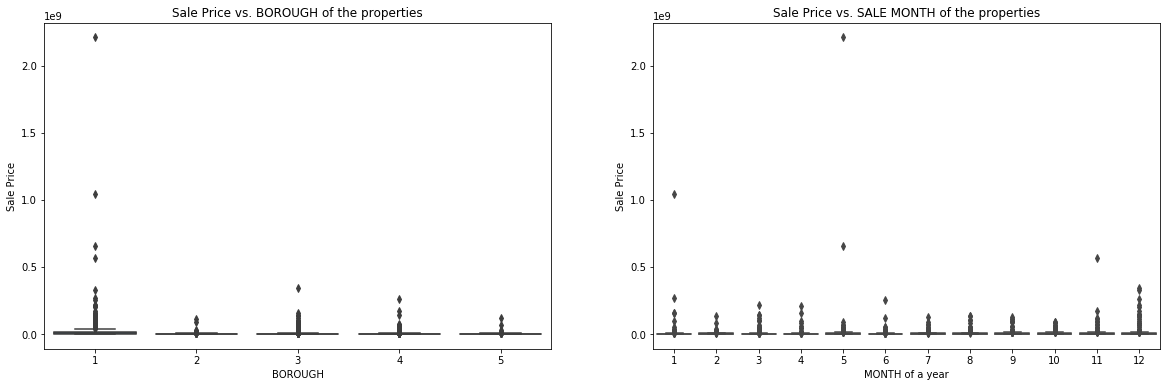

In [44]:
fig = plt.figure(figsize=(20,6)) # create figure

ax1 = fig.add_subplot(1,2,1) # add subplot 1 (1 row, 2 columns, first plot)
ax2 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1:
sns.boxplot(x="BOROUGH", y="SALE PRICE", data=df, ax=ax1)
ax1.set_title('Sale Price vs. BOROUGH of the properties')
ax1.set_ylabel('Sale Price')
ax1.set_xlabel("BOROUGH")

# Subplot 2:
sns.boxplot(x="SALE MONTH", y="SALE PRICE", data=df, ax=ax2)
ax2.set_title ('Sale Price vs. SALE MONTH of the properties')
ax2.set_ylabel('Sale Price')
ax2.set_xlabel('MONTH of a year')
#ax2.set_xlim([1750,2020])

plt.show()

### sale prices in Manhattan is way more higher than other boroughs. The other boroughs are almost the same. "SALE MONTH" does not have impact on the price

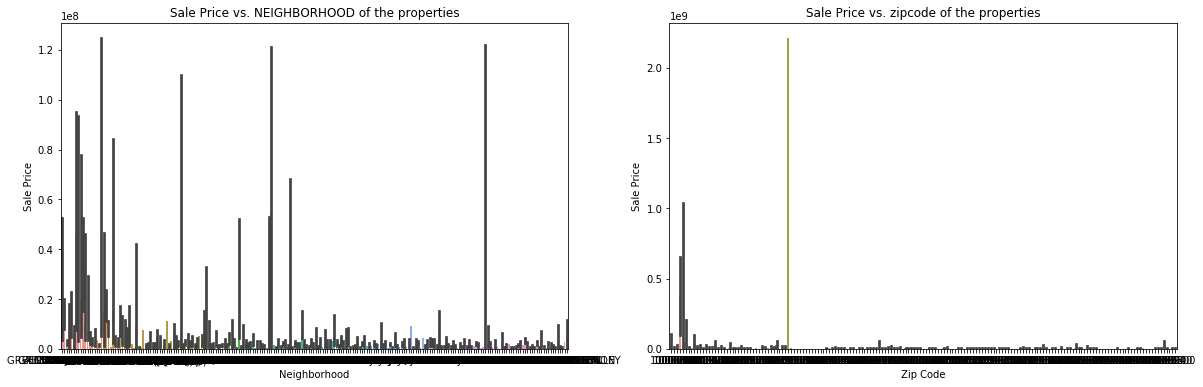

In [45]:
from numpy import median
fig = plt.figure(figsize=(20,6)) # create figure

ax1 = fig.add_subplot(1,2,1) # add subplot 1 (1 row, 2 columns, first plot)
ax2 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1:
sns.barplot(x="NEIGHBORHOOD", y="SALE PRICE", data=df, ax=ax1, estimator=median)
ax1.set_title('Sale Price vs. NEIGHBORHOOD of the properties')
ax1.set_ylabel('Sale Price')
ax1.set_xlabel("Neighborhood")

# Subplot 2:
sns.barplot(x="ZIP CODE", y="SALE PRICE", data=df, ax=ax2, estimator=median)
ax2.set_title ('Sale Price vs. zipcode of the properties')
ax2.set_ylabel('Sale Price')
ax2.set_xlabel('Zip Code')
#ax2.set_xlim([1750,2020])

plt.show()

_different neighborhood does have impact on the sale price. We will keep "ZIP CODE" as a variable for "SALE PRICE"_

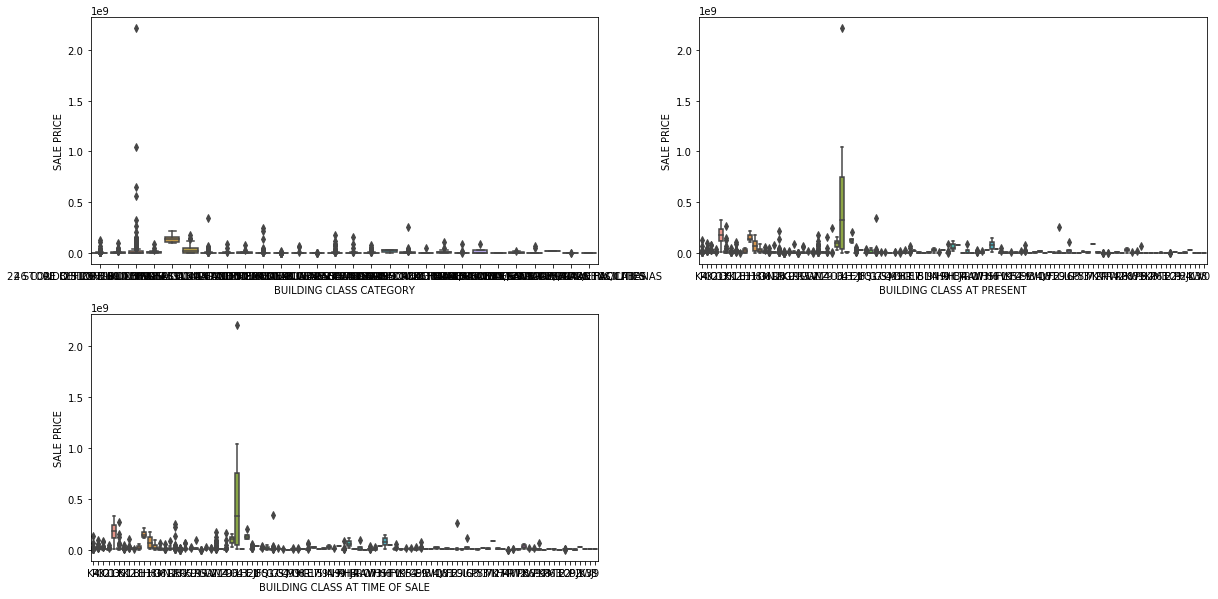

In [46]:
fig = plt.figure(figsize=(20,10)) # create figure

((ax1, ax2),(ax3, ax4))=fig.subplots(2,2)

# Subplot 1:
sns.boxplot(x="BUILDING CLASS CATEGORY", y="SALE PRICE", data=df, ax=ax1)

# Subplot 2:
sns.boxplot(x="BUILDING CLASS AT PRESENT", y="SALE PRICE", data=df,ax=ax2)

# Subplot 3:
sns.boxplot(x="BUILDING CLASS AT TIME OF SALE", y="SALE PRICE", data=df, ax=ax3)

fig.delaxes(ax4)
plt.show()

"BUILDING CLASS CATEGORY" does not show any indication of "SALE PRICE". However, "BUILDING CLASS AT RESENT" and "BUILDING CLASS AT TIME OF SALE" do differentiate "SALE PRICE" more. RK(RETAIL SPACE) and E1(FIREPROOF WAREHOUSE SIX) do stand out from the crowds. Since the target is sale price, "BUILDING CLASS AT TIME OF SALE" will be a potential variable. 

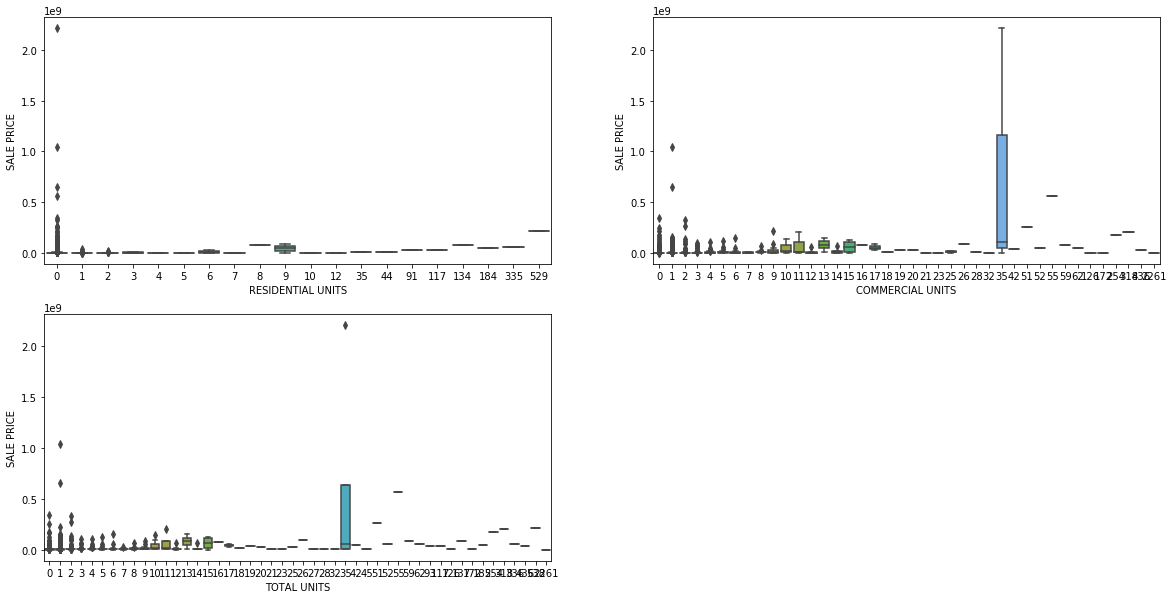

In [47]:
fig = plt.figure(figsize=(20,10)) # create figure

((ax1, ax2),(ax3, ax4))=fig.subplots(2,2)

# Subplot 1:
sns.boxplot(x="RESIDENTIAL UNITS", y="SALE PRICE", data=df, ax=ax1)

# Subplot 2:
sns.boxplot(x="COMMERCIAL UNITS", y="SALE PRICE", data=df,ax=ax2)

# Subplot 3:
sns.boxplot(x="TOTAL UNITS", y="SALE PRICE", data=df, ax=ax3)

fig.delaxes(ax4)
plt.show()

### "RESIDENTIAL UNITS" and "COMMERCIAL UNITS" do have impact on "SALE PRICE"

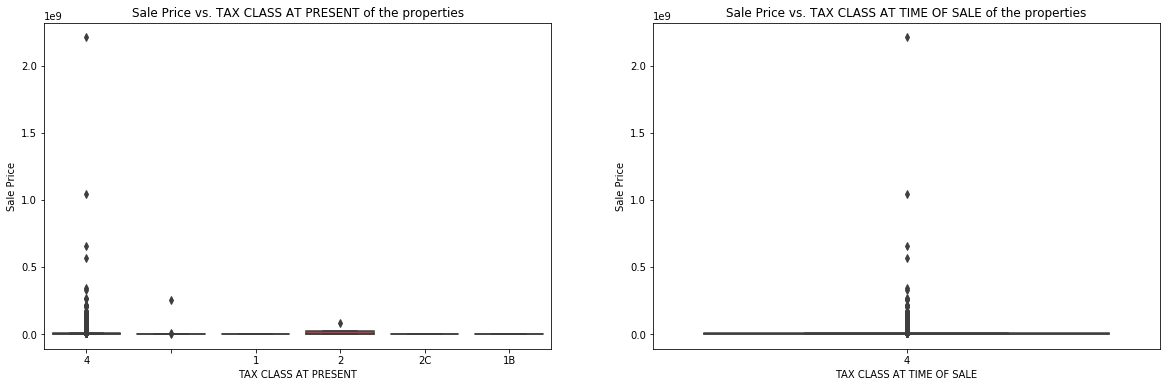

In [48]:
fig = plt.figure(figsize=(20,6)) # create figure

ax1 = fig.add_subplot(1,2,1) # add subplot 1 (1 row, 2 columns, first plot)
ax2 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1:
sns.boxplot(x="TAX CLASS AT PRESENT", y="SALE PRICE", data=df, ax=ax1)
ax1.set_title('Sale Price vs. TAX CLASS AT PRESENT of the properties')
ax1.set_ylabel('Sale Price')
ax1.set_xlabel("TAX CLASS AT PRESENT")

# Subplot 2:
sns.boxplot(x="TAX CLASS AT TIME OF SALE", y="SALE PRICE", data=df, ax=ax2)
ax2.set_title ('Sale Price vs. TAX CLASS AT TIME OF SALE of the properties')
ax2.set_ylabel('Sale Price')
ax2.set_xlabel('TAX CLASS AT TIME OF SALE')
#ax2.set_xlim([1750,2020])

plt.show()

"TAX CLASS AT TIME OF SALE", "TAX CLASS AT PRESENT" do not have impact on "SALE PRICE".

### In summary, 
1. The columns _"BOROUGH"_, _"NEIGHBORHOOD"_, _"ZIP CODE"_, _"BUILDING CLASS AT TIME OF SALE"_ could be potential categorical predictors for "SALE PRICE". 
2. "RESIDENTIAL UNITS" and "COMMERCIAL UNITS" could be potential predictors for "SALE PRICE".
3. Real estate price is all about location, location... Since location is a categorical variable, it is better use classification for "SALE PRICE". That is the practice realtors use also. Quite often, realtors estimate a house based on the value of houses nearby and in the same category. I will bin the "SALE PRICE" for the classification.

In [49]:
print("Sale price min:", df["SALE PRICE"].min())
print("Sale price max:", df["SALE PRICE"].max())

Sale price min: 10000.0
Sale price max: 2210000000.0


In [50]:
df.shape

(2347, 23)

_Use quantile bins_

In [51]:
pd.qcut(df["SALE PRICE"], q=4, precision=1)#.value_counts()

0          (1424835.0, 4115848.5]
1       (4115848.5, 2210000000.0]
2       (4115848.5, 2210000000.0]
3       (4115848.5, 2210000000.0]
4       (4115848.5, 2210000000.0]
                  ...            
2342        (425000.0, 1424835.0]
2343        (425000.0, 1424835.0]
2344       (1424835.0, 4115848.5]
2345    (4115848.5, 2210000000.0]
2346           (9999.9, 425000.0]
Name: SALE PRICE, Length: 2347, dtype: category
Categories (4, interval[float64]): [(9999.9, 425000.0] < (425000.0, 1424835.0] < (1424835.0, 4115848.5] < (4115848.5, 2210000000.0]]

In [52]:
df["SALE PRICE QUANTILE"]=pd.qcut(df["SALE PRICE"], q=4, precision=2, labels=[0,1,2,3])

## **Conclusion:**
1. The columns _"BOROUGH"_ and _"NEIGHBORHOOD"_ all contain in the _"ZIP CODE"_. _"ZIP CODE"_ will be used because they are numerical.
2. _"BUILDING CLASS NUMBER"_ will be another potential categorical predictors for "SALE PRICE". 
3. _"AGE"_ could be the potential continuous variable for "SALE PRICE".
4. "RESIDENTIAL UNITS" and "COMMERCIAL UNITS" will be potential predictors for "SALE PRICE".

# **Data modeling**
Since most of the independent variables are categorical, I find regression is a little misleading. KNN Classification looks more appropriate for this problem. 

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2347 entries, 0 to 2346
Data columns (total 24 columns):
BOROUGH                           2347 non-null int64
NEIGHBORHOOD                      2347 non-null object
BUILDING CLASS CATEGORY           2347 non-null object
TAX CLASS AT PRESENT              2347 non-null object
BLOCK                             2347 non-null int64
LOT                               2347 non-null int64
BUILDING CLASS AT PRESENT         2347 non-null object
ADDRESS                           2347 non-null object
APARTMENT NUMBER                  2347 non-null object
ZIP CODE                          2347 non-null float64
RESIDENTIAL UNITS                 2347 non-null int64
COMMERCIAL UNITS                  2347 non-null int64
TOTAL UNITS                       2347 non-null int64
LAND SQUARE FEET                  2347 non-null float64
GROSS SQUARE FEET                 1335 non-null float64
YEAR BUILT                        2347 non-null float64
TAX CLASS AT TI

In [54]:
#df[["BUILDING CLASS AT TIME OF SALE","BUILDING CLASS NUMBER"]]

In [55]:
df["BUILDING CLASS NUMBER"].value_counts()

82.66    234
82.71    194
86.10    173
75.10    172
75.40    172
        ... 
81.80      1
74.10      1
72.72      1
89.30      1
73.30      1
Name: BUILDING CLASS NUMBER, Length: 99, dtype: int64

In [56]:
df["ZIP CODE"].value_counts()

11354.0    122
11201.0     79
11101.0     57
11235.0     52
10013.0     49
          ... 
11411.0      1
10037.0      1
10009.0      1
10280.0      1
11363.0      1
Name: ZIP CODE, Length: 173, dtype: int64

df_test =df["ZIP CODE"].value_counts().to_frame("counts")
df_test[df_test["counts"]<3].sum()

_There are 62(4% of 1542) commercial properties from Zip Code with 3 or less properties transacted within. should remove them_

#df[df["ZIP CODE"].isin(df_test[df_test["counts"]<3].index.to_list())].shape

In [57]:
#df[df["ZIP CODE"].isin(df_test[df_test["counts"]<3].index.to_list())].to_csv("commercial_nonactivezipcode.csv")

In [58]:
#df.drop(df[df["ZIP CODE"].isin(df_test[df_test["counts"]<3].index.to_list())].index, axis=0, inplace=True)
#df.shape

In [59]:
from sklearn import preprocessing
import itertools
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

### To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array:

In [60]:
# feature array, 
X = df[["ZIP CODE", "BUILDING CLASS NUMBER", "RESIDENTIAL UNITS", "COMMERCIAL UNITS"]].values
X[0:5]

array([[1.0009e+04, 7.5400e+01, 0.0000e+00, 1.0000e+00],
       [1.0002e+04, 8.2750e+01, 0.0000e+00, 0.0000e+00],
       [1.0002e+04, 8.2750e+01, 0.0000e+00, 0.0000e+00],
       [1.0011e+04, 7.9200e+01, 0.0000e+00, 3.0000e+00],
       [1.0011e+04, 7.9100e+01, 1.0000e+00, 1.0000e+00]])

In [61]:
y = df["SALE PRICE QUANTILE"].astype("int").values
y[0:5]

array([2, 3, 3, 3, 3])

## Normalize Data

In [62]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-1.59433539e+00, -4.90954138e-01, -5.53428240e-02,
        -3.97721195e-02],
       [-1.60730551e+00,  8.21342170e-01, -5.53428240e-02,
        -6.03690226e-02],
       [-1.60730551e+00,  8.21342170e-01, -5.53428240e-02,
        -6.03690226e-02],
       [-1.59062964e+00,  1.87511981e-01, -5.53428240e-02,
         1.42168653e-03],
       [-1.59062964e+00,  1.69657609e-01,  1.54031498e-02,
        -3.97721195e-02]])

### Train Test Split  
Out of Sample Accuracy is the percentage of correct predictions that the model makes on data that that the model has NOT been trained on. Doing a train and test on the same dataset will most likely have low out-of-sample accuracy, due to the likelihood of being over-fit.

It is important that our models have a high, out-of-sample accuracy, because the purpose of any model, of course, is to make correct predictions on unknown data. So how can we improve out-of-sample accuracy? One way is to use an evaluation approach called Train/Test Split.
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. 

This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

In [63]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1877, 4) (1877,)
Test set: (470, 4) (470,)


<div id="classification">
    <h2>Classification</h2>
</div>

<h3>K nearestneighbor (KNN)</h3>

#### Import library 
Classifier implementing the k-nearest neighbors vote.

#### What about K?
K in KNN, is the number of nearest neighbors to examine. It is supposed to be specified by the User. So, how can we choose right value for K?
The general solution is to reserve a part of your data for testing the accuracy of the model. Then chose k =1, use the training part for modeling, and calculate the accuracy of prediction using all samples in your test set. Repeat this process, increasing the k, and see which k is the best for your model.

We can calculate the accuracy of KNN for different Ks.

In [64]:
Ks = 50
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
#ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.48510638, 0.48085106, 0.49148936, 0.50425532, 0.5106383 ,
       0.54042553, 0.52978723, 0.52340426, 0.52765957, 0.52553191,
       0.50851064, 0.51914894, 0.52340426, 0.53617021, 0.52340426,
       0.52978723, 0.52765957, 0.52340426, 0.5212766 , 0.51276596,
       0.5106383 , 0.51914894, 0.52340426, 0.5106383 , 0.51276596,
       0.51276596, 0.51489362, 0.51914894, 0.5212766 , 0.5212766 ,
       0.5212766 , 0.50638298, 0.51489362, 0.51489362, 0.51276596,
       0.51276596, 0.51276596, 0.5106383 , 0.50212766, 0.49787234,
       0.49148936, 0.49787234, 0.49361702, 0.49787234, 0.49148936,
       0.49574468, 0.49787234, 0.50212766, 0.50638298])

In [65]:
std_acc

array([0.02305305, 0.02304636, 0.02305994, 0.02306244, 0.02305806,
       0.02298778, 0.02302232, 0.023038  , 0.02302796, 0.02303319,
       0.02305994, 0.02304636, 0.023038  , 0.02300285, 0.023038  ,
       0.02302232, 0.02302796, 0.023038  , 0.02304239, 0.02305576,
       0.02305806, 0.02304636, 0.023038  , 0.02305806, 0.02305576,
       0.02305576, 0.02305305, 0.02304636, 0.02304239, 0.02304239,
       0.02304239, 0.0230614 , 0.02305305, 0.02305305, 0.02305576,
       0.02305576, 0.02305576, 0.02305806, 0.02306307, 0.02306307,
       0.02305994, 0.02306307, 0.0230614 , 0.02306307, 0.02305994,
       0.02306244, 0.02306307, 0.02306307, 0.0230614 ])

#### Plot  model accuracy  for Different number of Neighbors 

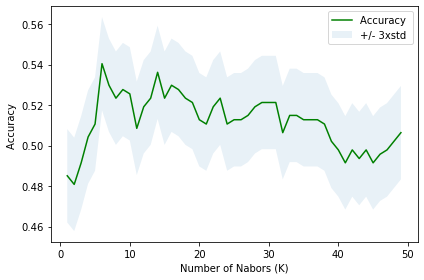

In [66]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [67]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.5404255319148936 with k= 6


In [68]:
neigh = KNeighborsClassifier(n_neighbors = 6).fit(X_train,y_train)
yhat=neigh.predict(X_test)
print("acc:", metrics.accuracy_score(y_test, yhat))

acc: 0.5404255319148936


In [69]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.66      0.75      0.70       123
           1       0.43      0.46      0.45       125
           2       0.42      0.44      0.43       103
           3       0.65      0.50      0.56       119

   micro avg       0.54      0.54      0.54       470
   macro avg       0.54      0.54      0.54       470
weighted avg       0.55      0.54      0.54       470

Normalized confusion matrix
[[0.75 0.18 0.04 0.03]
 [0.18 0.46 0.24 0.12]
 [0.12 0.32 0.44 0.13]
 [0.11 0.18 0.22 0.5 ]]


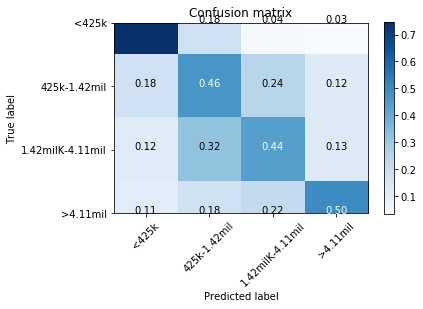

In [70]:
# Compute confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1,2,3])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["<425k","425k-1.42mil","1.42milK-4.11mil", ">4.11mil"],\
                      normalize= True,  title='Confusion matrix')